# WIP: Sales Forecasting

## Introduction

## Approach

## The Store Sales - Time Series Forecasting Competition

## The Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('data/store-sales-time-series-forecasting/train.csv', index_col='date')
train.index = pd.to_datetime(train.index)
train

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [31]:
train.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [64]:
len(train.store_nbr.unique())

54

### Time Series analysis

Text(0, 0.5, '# items on promotion')

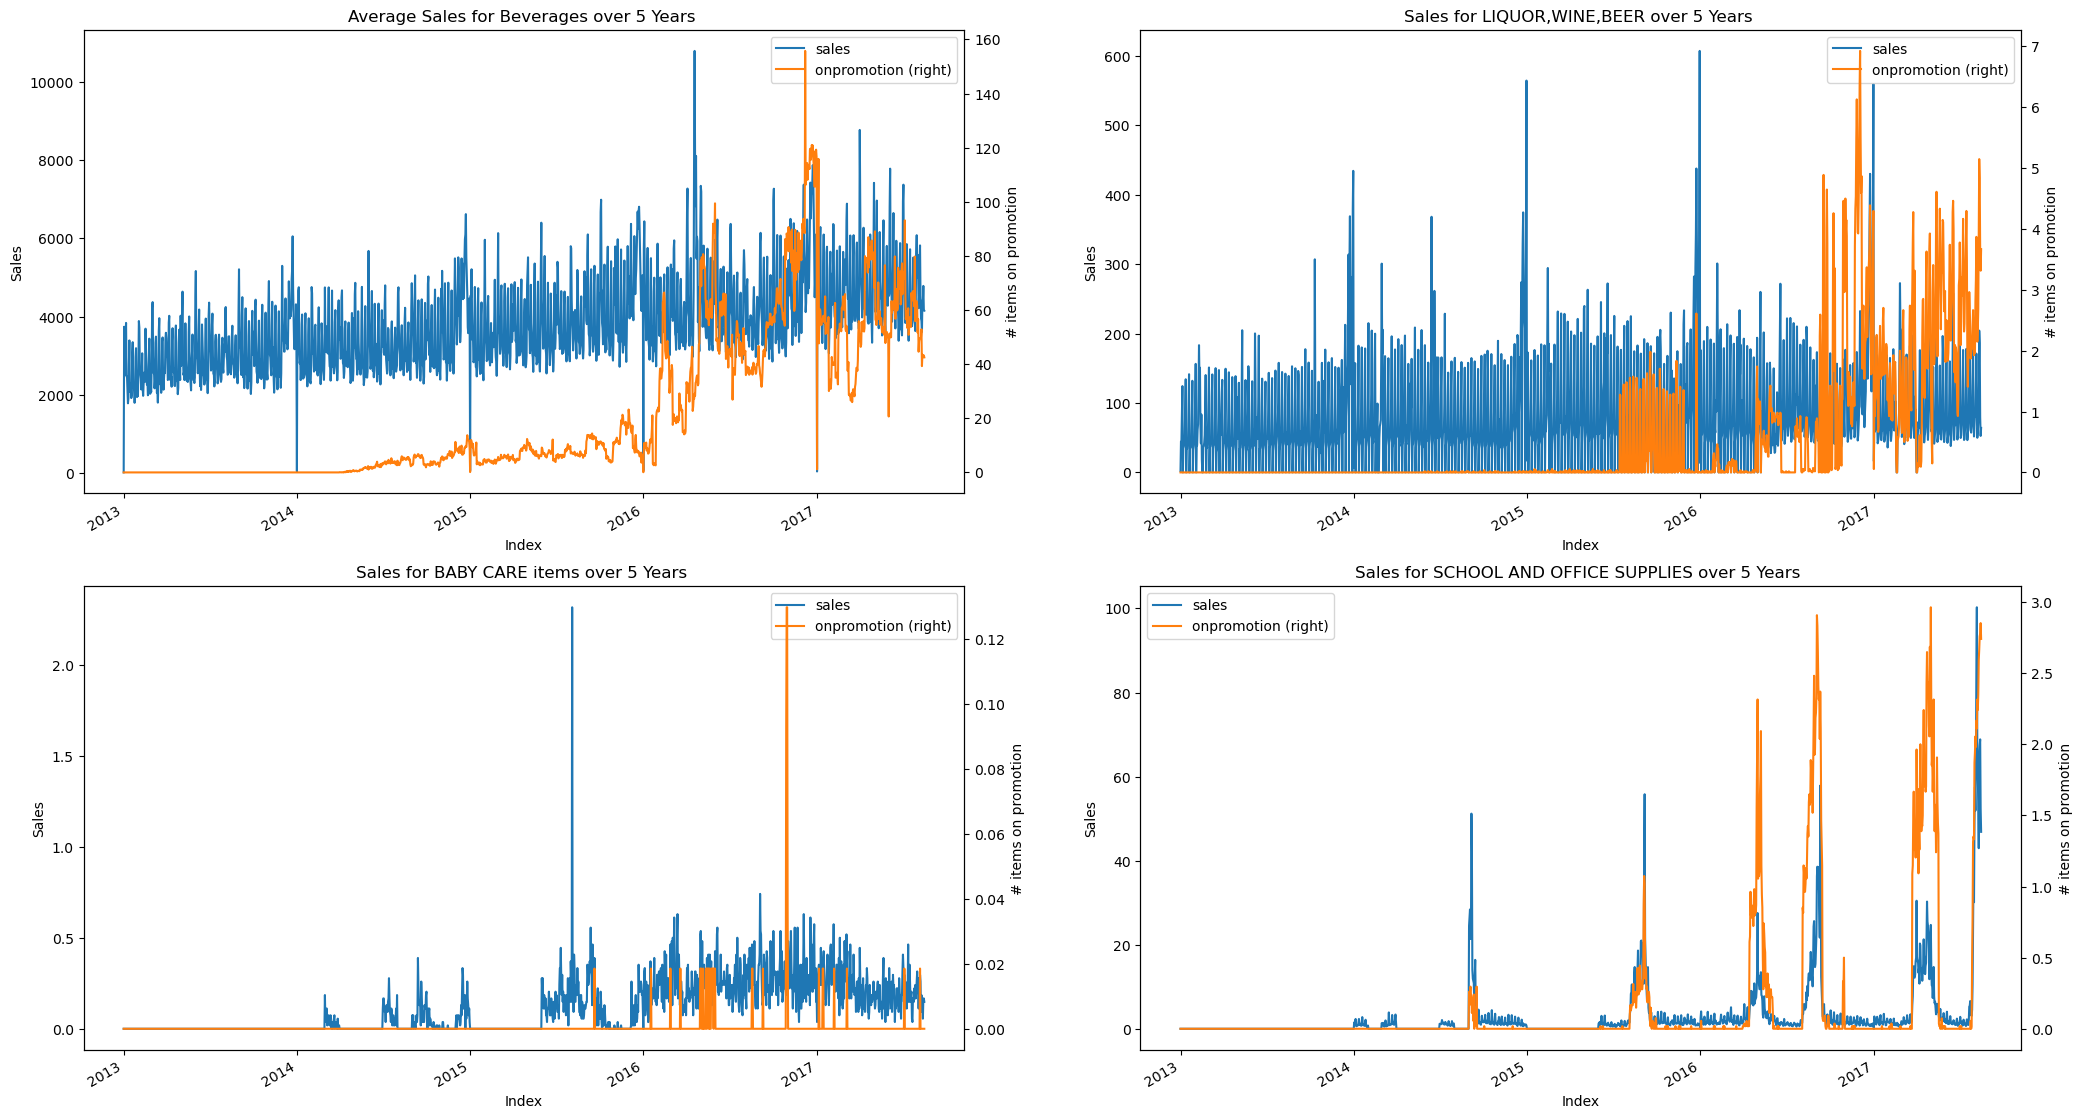

In [44]:
# Plot multiple examples of time series into a subplot

fig, ax = plt.subplots(2,2, figsize=(25,15))
train.groupby('family').get_group('GROCERY I').groupby('date')[['sales', 'onpromotion']].mean(numeric_only=True).plot(kind='line', secondary_y='onpromotion', ax=ax[0][0]) # compute average sales per day by family, to construct a store independent time series that can be plotted
ax[0][0].set_title('Average Sales for Beverages over 5 Years ')
ax[0][0].set_xlabel('Index')
ax[0][0].set_ylabel('Sales')
ax[0][0].right_ax.set_ylabel('# items on promotion')

train.groupby('family').get_group('LIQUOR,WINE,BEER').groupby('date')[['sales', 'onpromotion']].mean(numeric_only=True).plot(kind='line', secondary_y='onpromotion', ax=ax[0][1])
ax[0][1].set_title('Sales for LIQUOR,WINE,BEER over 5 Years ')
ax[0][1].set_xlabel('Index')
ax[0][1].set_ylabel('Sales')
ax[0][1].right_ax.set_ylabel('# items on promotion')

train.groupby('family').get_group('BABY CARE').groupby('date')[['sales', 'onpromotion']].mean(numeric_only=True).plot(kind='line', secondary_y='onpromotion', ax=ax[1][0])
ax[1][0].set_title('Sales for BABY CARE items over 5 Years ')
ax[1][0].set_xlabel('Index')
ax[1][0].set_ylabel('Sales')
ax[1][0].right_ax.set_ylabel('# items on promotion')

train.groupby('family').get_group('SCHOOL AND OFFICE SUPPLIES').groupby('date')[['sales', 'onpromotion']].mean(numeric_only=True).plot(kind='line', secondary_y='onpromotion', ax=ax[1][1])
ax[1][1].set_title('Sales for SCHOOL AND OFFICE SUPPLIES over 5 Years ')
ax[1][1].set_xlabel('Index')
ax[1][1].set_ylabel('Sales')
ax[1][1].right_ax.set_ylabel('# items on promotion')

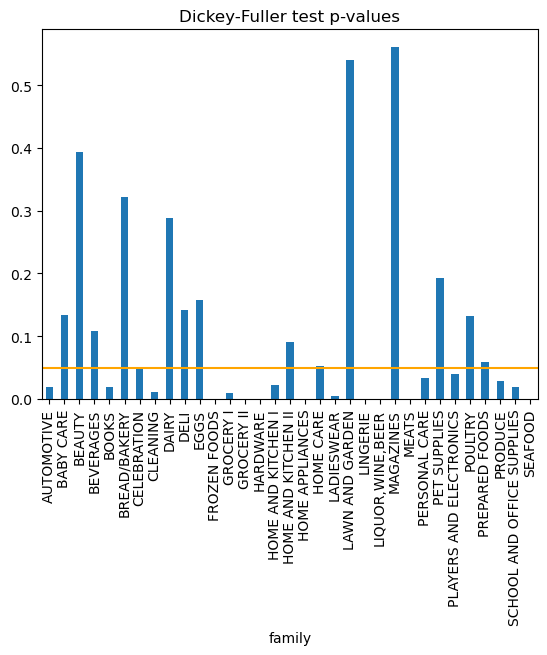

In [166]:
from statsmodels.tsa.stattools import adfuller
dickey_fuller = train.groupby('family').apply(lambda x: adfuller(x.groupby('date').mean()['sales'])[1])
ax = dickey_fuller.plot(kind='bar', title='Dickey-Fuller test p-values')
ax.axhline(y=0.05, label='significance level', color='orange')
plt.show()

### Feature Analysis

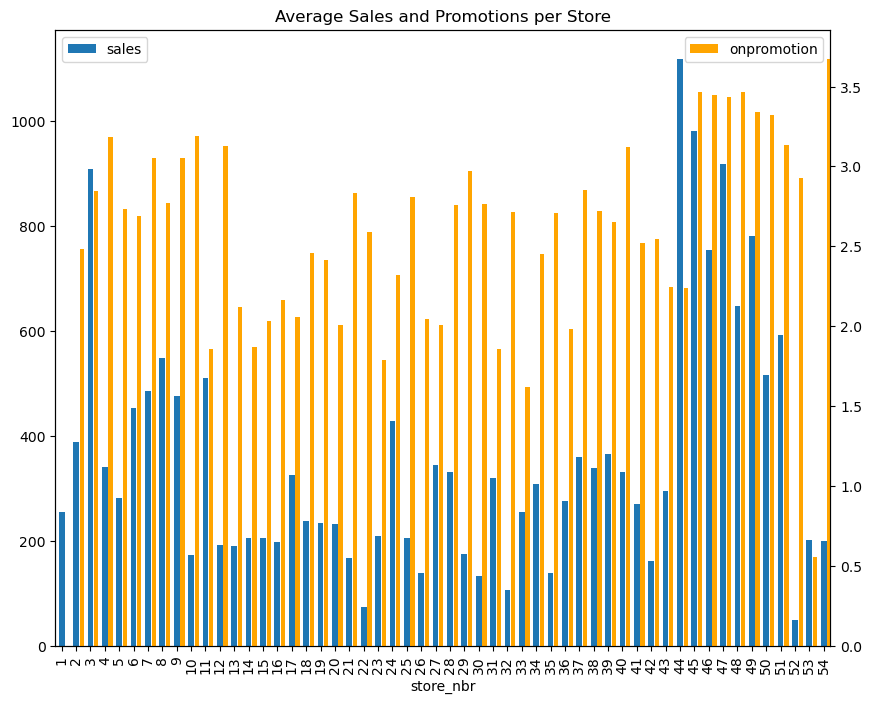

In [63]:
tmp = train[['store_nbr', 'sales', 'onpromotion']].groupby('store_nbr').mean() # compute average per store

# plot data into a bar plot with two y axis, as promotion counts are much smaller than sale values
ax = tmp.plot(kind='bar', y='sales', figsize=(10,8), width=0.4)
ax2 = ax.twinx()
ax2.bar(tmp.index + 0.4, tmp.onpromotion, width=0.3, label='onpromotion', color='orange')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Average Sales and Promotions per Store')
plt.show()

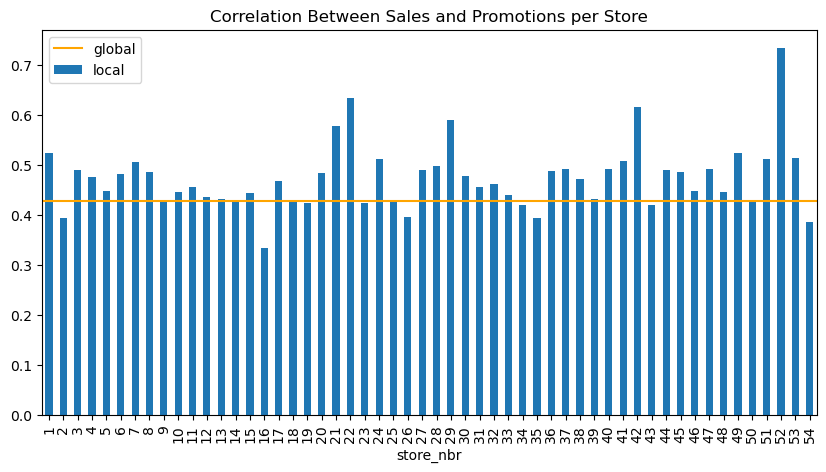

In [61]:
ax = train.groupby('store_nbr').apply(lambda group: group['sales'].corr(group['onpromotion'])).plot(kind='bar', figsize=(10,5), title='Correlation Between Sales and Promotions per Store', label='local') # Compute correlation per store
ax.axhline(y=train.sales.corr(train.onpromotion), color='orange', label='global') # Plot global correlation
plt.legend()
plt.show()


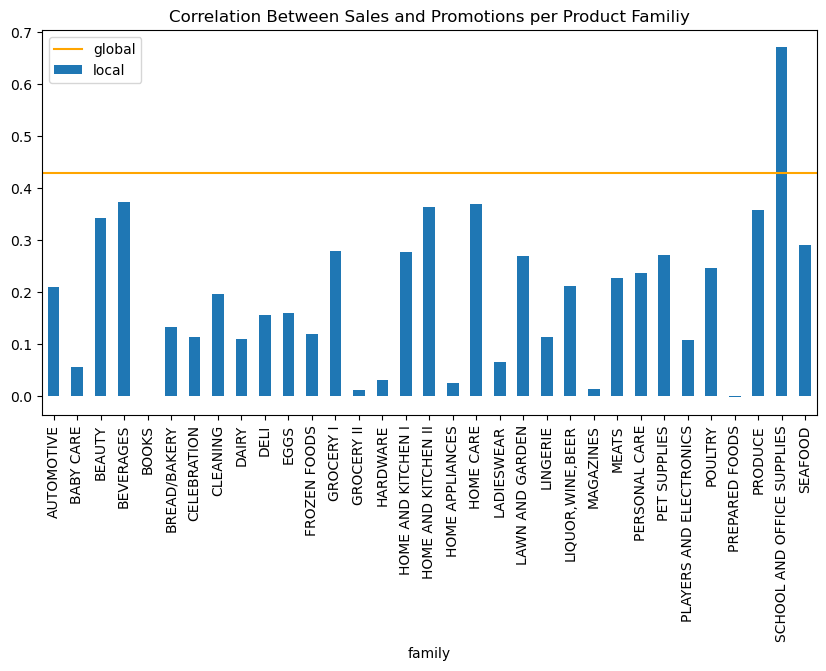

In [147]:
ax = train.groupby('family').apply(lambda group: group['sales'].corr(group['onpromotion'])).plot(kind='bar', figsize=(10,5), title='Correlation Between Sales and Promotions per Product Familiy', label='local') # Compute correlation per Product Family
ax.axhline(y=train.sales.corr(train.onpromotion), color='orange', label='global') # Plot global correlation
plt.legend()
plt.show()

### Spatial Influence

Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

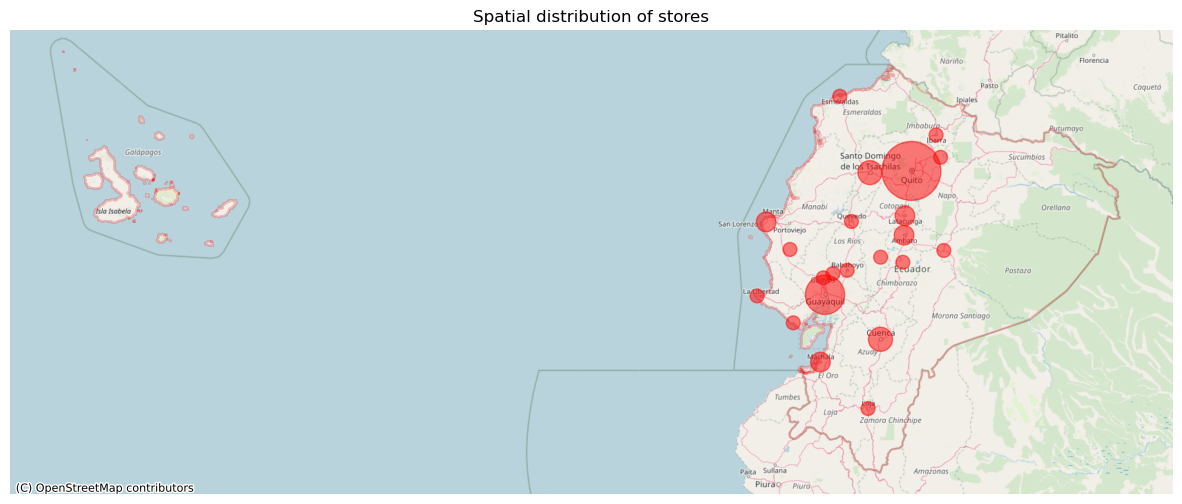

In [83]:
import geopandas as gpd
from geopy.geocoders import Nominatim
import swifter
import contextily as ctx

# Plot Number of Stores per city

# Load data and count stores per city
stores_df = pd.read_csv('data/store-sales-time-series-forecasting/stores.csv')
stores_per_city = stores_df.groupby('city')['store_nbr'].count().to_frame()
stores_per_city.rename(columns={'store_nbr': 'store_count'}, inplace=True)

geo_locator = Nominatim(user_agent='geoapiExercises')

# Retrieve geocoordinates for city and state
def get_lat_long(city, state):
    location = geo_locator.geocode(f"{city}, {state}, Ecuador")
    return location.latitude ,location.longitude

# annotate store data with geo coordinates
stores_df['coords'] = stores_df.swifter.apply(lambda row: get_lat_long(city=row['city'], state=row['state']), axis=1)

# merge number of stores per city with geodata
stores_df = pd.merge(left=stores_per_city, right=stores_df[['city', 'coords']], left_on='city', right_on='city', how='left').drop_duplicates()
stores_df['scaled_counts'] = 100 * stores_df.store_count

# Construct geopandas dataframe to enable spatial operations
gdf = gpd.GeoDataFrame(stores_df, geometry=gpd.points_from_xy(
    stores_df['coords'].apply(lambda x: x[1]),
    stores_df['coords'].apply(lambda x: x[0])
))
# change reference coordinate system to EPSG:3857, so that the background can be drawn via contextily
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs("EPSG:3857")

# load ecuador borders to mark area of interest
ecuador_shapefile = gpd.read_file('data/ecuador_boundaries_2015.json')
ecuador_shapefile.crs = "EPSG:4326"
ecuador_shapefile = ecuador_shapefile.to_crs("EPSG:3857")

ax = ecuador_shapefile.boundary.plot(figsize=(15, 14), color='red', alpha=0.2) # plot boundaries
gdf.plot(ax=ax, markersize='scaled_counts', color='red', marker='o', alpha=0.5, ) # plot data, the size of the marker represents the number of stores
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.DE) # add background

ax.set_axis_off() # hide x and y axis
plt.title("Spatial distribution of stores")
plt.show()

Pandas Apply:   0%|          | 0/22 [00:00<?, ?it/s]

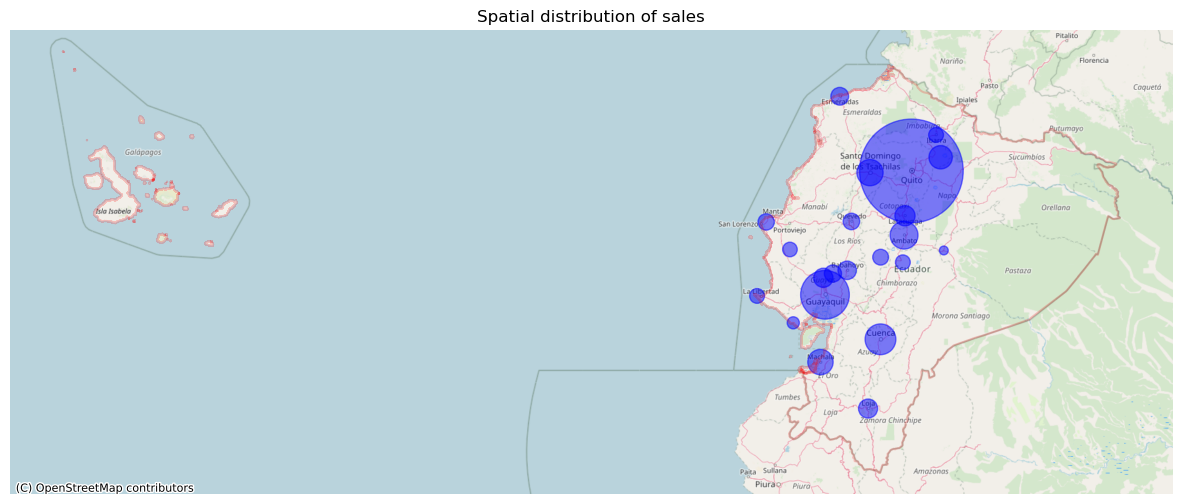

In [78]:
# Plot Sales per City

stores_df = pd.read_csv('data/store-sales-time-series-forecasting/stores.csv')

geo_locator = Nominatim(user_agent='geoapiExercises')

stores_df = pd.merge(stores_df, train[['store_nbr', 'sales', 'onpromotion']], left_on='store_nbr', right_on='store_nbr')
stores_df = pd.merge(left=stores_df[['city', 'state']], right=stores_df[['city', 'sales', 'onpromotion']].groupby('city').sum(), left_on='city', right_on='city', how='right').drop_duplicates().reset_index(drop=True) # merge sale data into stores

stores_df['sales'] = stores_df['sales'] / 100000 # scale sales data to a reasonable size that can actually be plotted

# Same procedure as above for actually plotting onto the map
def get_lat_long(city, state):
    location = geo_locator.geocode(f"{city}, {state}, Ecuador")
    return location.latitude ,location.longitude

stores_df['coords'] = stores_df.swifter.apply(lambda row: get_lat_long(city=row['city'], state=row['state']), axis=1)


gdf = gpd.GeoDataFrame(stores_df, geometry=gpd.points_from_xy(
    stores_df['coords'].apply(lambda x: x[1]),
    stores_df['coords'].apply(lambda x: x[0])
))
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs("EPSG:3857")
ecuador_shapefile = gpd.read_file('data/ecuador_boundaries_2015.json')
ecuador_shapefile.crs = "EPSG:4326"
ecuador_shapefile = ecuador_shapefile.to_crs("EPSG:3857")
ax = ecuador_shapefile.boundary.plot(figsize=(15, 14), color='red', alpha=0.2)
gdf.plot(ax=ax, markersize='sales', color='blue', marker='o', alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.DE)

ax.set_axis_off()
plt.title("Spatial distribution of sales")
plt.show()

Pandas Apply:   0%|          | 0/22 [00:00<?, ?it/s]

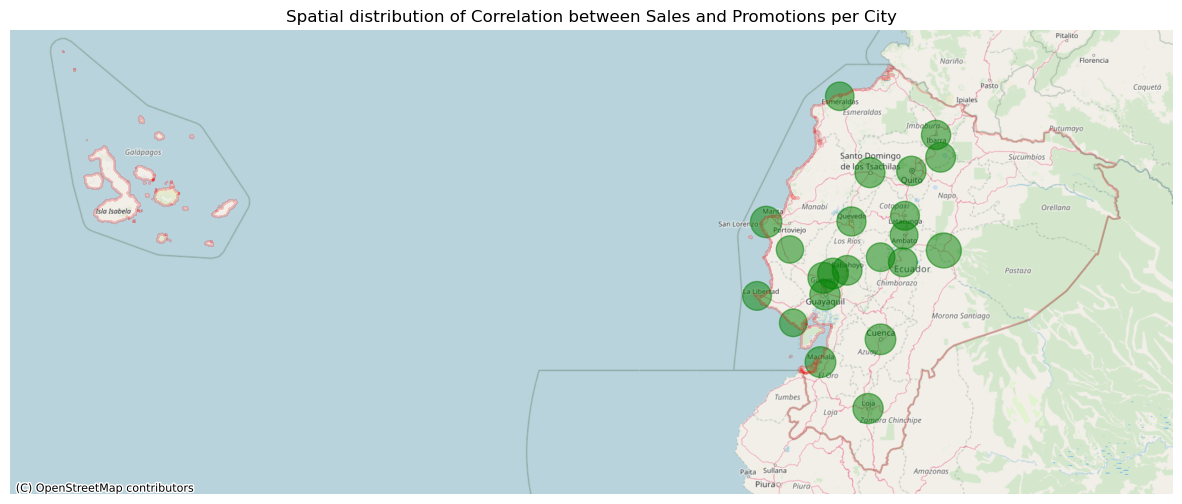

In [82]:
# Plot Correlation of Promotions and Sales per City

stores_df = pd.read_csv('data/store-sales-time-series-forecasting/stores.csv')

geo_locator = Nominatim(user_agent='geoapiExercises')

stores_df = pd.merge(stores_df, train[['store_nbr', 'sales', 'onpromotion']], left_on='store_nbr', right_on='store_nbr')
stores_df = pd.merge(
    left=stores_df[['city', 'state']],
    right=stores_df[['city', 'sales', 'onpromotion']].groupby('city').apply(lambda group: group['sales'].corr(group['onpromotion'])).to_frame().rename(columns={0:'corr'}),
    left_on='city',
    right_on='city',
    how='right'
).drop_duplicates().reset_index(drop=True) # compute and merge correlation data into stores

stores_df['corr'] = stores_df['corr'] * 1000 # scale values so that they can actually be plotted, otherwise they are just too small


# same procedure as above for actually plotting to the map
def get_lat_long(city, state):
    location = geo_locator.geocode(f"{city}, {state}, Ecuador")
    return location.latitude ,location.longitude

stores_df['coords'] = stores_df.swifter.apply(lambda row: get_lat_long(city=row['city'], state=row['state']), axis=1)


gdf = gpd.GeoDataFrame(stores_df, geometry=gpd.points_from_xy(
    stores_df['coords'].apply(lambda x: x[1]),
    stores_df['coords'].apply(lambda x: x[0])
))
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs("EPSG:3857")
ecuador_shapefile = gpd.read_file('data/ecuador_boundaries_2015.json')
ecuador_shapefile.crs = "EPSG:4326"
ecuador_shapefile = ecuador_shapefile.to_crs("EPSG:3857")
ax = ecuador_shapefile.boundary.plot(figsize=(15, 14), color='red', alpha=0.2)
gdf.plot(ax=ax, markersize='corr', color='green', marker='o', alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.DE)

ax.set_axis_off()
plt.title("Spatial distribution of Correlation between Sales and Promotions per City")
plt.show()

### Influence of Holidays

In [85]:
# Load Holiday Metadata
holidays = pd.read_csv('data/store-sales-time-series-forecasting/holidays_events.csv')
holidays.date = pd.to_datetime(holidays.date)
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [91]:
holidays.type.unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [92]:
len(holidays.date.unique())

312

In [93]:
len(train.date.unique())

1684

In [143]:
# Merge, train and holiday dataframe
stores_df = pd.read_csv('data/store-sales-time-series-forecasting/stores.csv') # load store data, as holidays are spatially dependend
train_with_locale = pd.merge(left=train, right=stores_df[['store_nbr','city', 'state']], on='store_nbr') # merge spatial info into train
train_with_holidays_and_local = pd.merge(train_with_locale, holidays, left_on=['date', 'city'], right_on=['date', 'locale_name'], how='left') # merge spatially dependent holidays
train_with_holidays_and_local = pd.merge(train_with_holidays_and_local, holidays.loc[holidays.locale == 'National'], left_on='date', right_on='date', how='left') # merge national holidays

# Merge all columns from the pd merge oprations into global ones
train_with_holidays_and_local['holiday_type'] = train_with_holidays_and_local.type_x.fillna(train_with_holidays_and_local.type_y)
train_with_holidays_and_local['holiday_locale'] = train_with_holidays_and_local.locale_x.fillna(train_with_holidays_and_local.locale_y)
train_with_holidays_and_local['holiday_description'] = train_with_holidays_and_local.description_x.fillna(train_with_holidays_and_local.description_y)
train_with_holidays_and_local.holiday_type = train_with_holidays_and_local.holiday_type.fillna('Normal day') # Fill Non Holiday days, so they still get assigned a numeric representation
train_with_holidays_and_local['holiday_id'] = pd.factorize(train_with_holidays_and_local.holiday_type)[0] # Assign Numeric Representations to holiday types
train_with_holidays_and_local.drop(columns=['type_x', 'locale_x', 'locale_name_x', 'description_x', 'transferred_x', 'type_y', 'locale_y', 'locale_name_y', 'description_y', 'transferred_y'], inplace=True) # drop unnecessary columns
train_with_holidays_and_local

,id,date,store_nbr,family,sales,onpromotion,city,state,holiday_type,holiday_locale,holiday_description,holiday_id
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,Holiday,National,Primer dia del ano,0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,Holiday,National,Primer dia del ano,0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,Holiday,National,Primer dia del ano,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,Holiday,National,Primer dia del ano,0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,Holiday,National,Primer dia del ano,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3008275,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,Normal day,NaN,NaN,1
3008276,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,Normal day,NaN,NaN,1
3008277,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,Normal day,NaN,NaN,1
3008278,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,Normal day,NaN,NaN,1


In [144]:
train_with_holidays_and_local.holiday_type.unique()

array(['Holiday', 'Normal day', 'Work Day', 'Additional', 'Event',
       'Transfer', 'Bridge'], dtype=object)

In [145]:
train_with_holidays_and_local.sales.corr(train_with_holidays_and_local.holiday_id) # calc correlation between holidays and sale changes

0.020468676992798807

<AxesSubplot: title={'center': 'Correlation Between Sales and Holidays per Product Familiy'}, xlabel='family'>

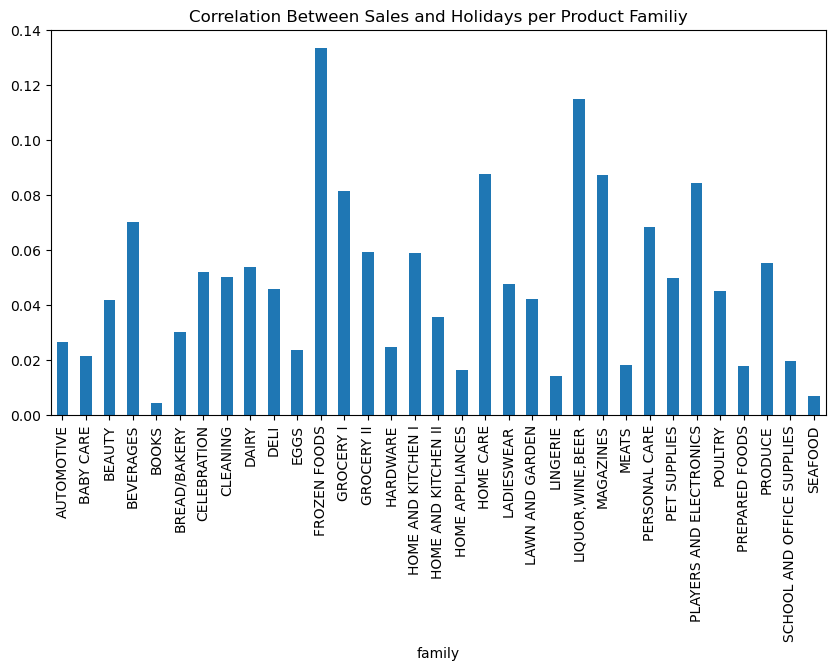

In [146]:
train_with_holidays_and_local.groupby('family').apply(lambda group: group['sales'].corr(group['holiday_id'])).plot(kind='bar', figsize=(10,5), title='Correlation Between Sales and Holidays per Product Familiy')

## Models

In [ ]:
# TODO: Look at models and determine a way to give them all the available information of the dataset

### Simple Moving Average

In [2]:
test_sma = pd.read_csv('data/store-sales-time-series-forecasting/test.csv', index_col='date')
test_sma

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0
...,...,...,...,...
2017-08-31,3029395,9,POULTRY,1
2017-08-31,3029396,9,PREPARED FOODS,0
2017-08-31,3029397,9,PRODUCE,1


In [49]:
from tqdm import tqdm

def sma(df, store_nbr, family):
    df = df.get_group((family, store_nbr))['sales'].to_frame()
    df['sma'] = df.sales.rolling(window=7, min_periods=1).mean()
    train_length = len(df)

    df = pd.concat([df, test_sma.groupby(['family', 'store_nbr']).get_group((family, store_nbr))])

    for i in np.arange(start=train_length, stop=len(df.sma)):
        idx = df.index[i]
        df.loc[idx, 'sma'] = df.sma[i-7:i].mean()
    return df, train_length

In [54]:

train_grouped = train.groupby(['family', 'store_nbr'])

result = None
for i, key in tqdm(enumerate(train_grouped.groups.keys())):

    df, train_length = sma(train_grouped, family=key[0], store_nbr=key[1])

    if i == 0:
        result = df[train_length:]
        result.set_index('id', inplace=True)
        continue

    result = pd.concat([result, df[train_length:].set_index('id')])

result.sales = result.sma
result.drop(columns=['onpromotion', 'family', 'sma', 'store_nbr'], inplace=True)
result.index = result.index.astype(int)
result.to_csv('model_submissions/sma.csv')
result


1782it [00:13, 132.57it/s]


,sales
id,
3000888,5.265306
3002670,5.201166
3004452,5.005414
3006234,4.924555
3008016,4.811737
...,...
3022139,2.648825
3023921,2.645671
3025703,2.648783


Ranked: Postition 123, Score: 0.46089, Metric: Root Mean Squared Error

### ARIMA

In [15]:
# Forecasting needs to be done by family and store nbr
train_ma = train.copy()
train_ma.index = pd.DatetimeIndex(train_ma.index).to_period('D')
train_ma_grouped = train_ma.groupby(['family', 'store_nbr'])
splitted_train_ma = {
    family: {
        store_nbr: {
            "df" : train_ma_grouped.get_group((family, store_nbr))['sales'].to_frame(),
            "lam": 0,
            "transformed": False
        }
        for store_nbr in train_ma.store_nbr.unique()
    } for family in train_ma.family.unique()
}
# splitted_train_ma

In [16]:
from scipy.stats import boxcox
from tqdm import tqdm
from statsmodels.tsa.stattools import adfuller

transformed = 0
total = 0

# transform each time series into a stationary one
for stores in tqdm(splitted_train_ma.values()):
    for store_nbr_dict in stores.values():

        # Clean leading zero only sequences, as they add noise to the forecast as they are irrelevant, and they lead to numerical and mathematical errors such as div by zero in log computation for dickey-fuller test
        mask = ~np.isclose(store_nbr_dict['df'].sales, 0)
        idx_of_first_non_zero = np.argmax(mask)

        # update dict pointers
        store_nbr_dict['df'] = store_nbr_dict['df'][idx_of_first_non_zero:].copy()
        store_nbr_df = store_nbr_dict['df']

        # check if sequence is stationary
        p_score = adfuller(store_nbr_df.sales)[1]

        total += 1

        if p_score < 0.05 or np.isclose(p_score, 0.05) or np.isnan(p_score):
            store_nbr_df['stationary'] = store_nbr_df.sales
            continue

        # make sequence stationary
        store_nbr_df['boxcox'], store_nbr_dict['lam'] = boxcox(store_nbr_df.sales + 1)
        store_nbr_df['stationary'] = store_nbr_df.sales.diff()
        store_nbr_df.stationary.fillna(0, inplace=True)
        store_nbr_dict['transformed'] = True

        transformed += 1

print(f'transformed {transformed} out of {total}')

  3%|▎         | 1/33 [00:03<01:42,  3.21s/it]/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encount

transformed 344 out of 1782


<AxesSubplot: xlabel='date'>

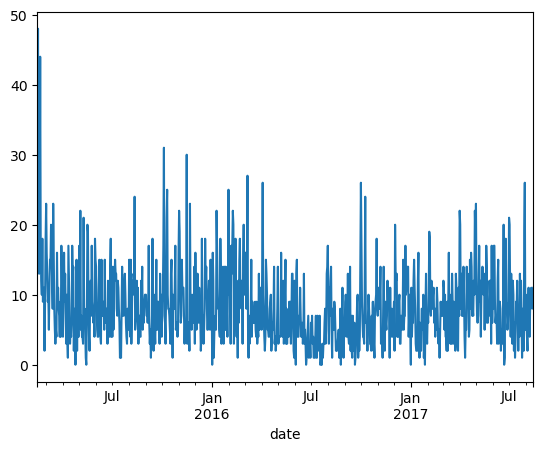

In [169]:
splitted_train_ma['AUTOMOTIVE'][20]['df'].stationary.plot() # TODO: The 0 sequences at the beginning are a problem -> Convergence error in ARIMA Forecasting, Log Likelyhood division 0 error in dickey-fuller test -> I need to further clean the data here

<AxesSubplot: xlabel='date'>

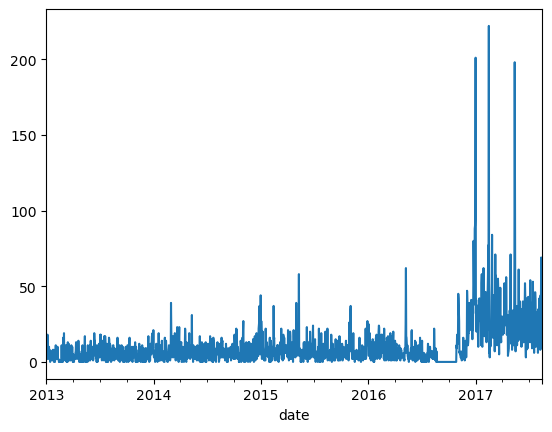

In [27]:
splitted_train_ma['LAWN AND GARDEN'][25]['df'].sales.plot()

In [184]:
# recheck p_scores

still_not_stationary = 0

for family, store in tqdm(splitted_train_ma.items()):
    for store_nbr, data in store.items():

        p_score = adfuller(data['df'].stationary)[1]

        if p_score < 0.05 or np.isclose(p_score, 0.05) or np.isnan(p_score):
            continue
        still_not_stationary += 1

print(f'{still_not_stationary} out of {total} are still not stationary')

100%|██████████| 33/33 [03:33<00:00,  6.47s/it]

0 out of 1782 are still not stationary


### Simple Arima
With default parameters (0,0,0)

In [292]:
from statsmodels.tsa.arima.model import ARIMA


def simple_arima_forecast(train_data: pd.DataFrame, test_data: pd.DataFrame):

    train_data.reset_index(inplace=True, drop=True)
    test_data.reset_index(inplace=True, drop=True)

    model = ARIMA(endog=train_data.stationary)
    model = model.fit()

    len_train = len(train_data)
    len_test = len(test_data)

    forecast = model.predict(n_periods=len_test)

    result = test_data.copy()
    forecast.reset_index(inplace=True, drop=True)
    result['sales'] = forecast

    return result


In [2]:
test_arima = pd.read_csv('data/store-sales-time-series-forecasting/test.csv', index_col='date')
test_arima.index = pd.DatetimeIndex(test_arima.index).to_period('D')

test_to_test = test_arima.groupby(['family', 'store_nbr']).get_group(('AUTOMOTIVE', 1))
test_to_test

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-17,3002670,1,AUTOMOTIVE,0
2017-08-18,3004452,1,AUTOMOTIVE,0
2017-08-19,3006234,1,AUTOMOTIVE,0
2017-08-20,3008016,1,AUTOMOTIVE,0
2017-08-21,3009798,1,AUTOMOTIVE,0
2017-08-22,3011580,1,AUTOMOTIVE,0
2017-08-23,3013362,1,AUTOMOTIVE,0
2017-08-24,3015144,1,AUTOMOTIVE,0


In [296]:
from scipy.special import inv_boxcox

def transform_into_original_space(forecast, lam, train_df):
    boxcox_forecasts = []
    for idx in range(len(forecast)):
        if idx == 0:
            boxcox_forecast = forecast.iloc[idx].sales + train_df['boxcox'].iloc[-1]
        else:
            boxcox_forecast = forecast.iloc[idx].sales + boxcox_forecasts[idx-1]

        boxcox_forecasts.append(boxcox_forecast)


    forecast.sales = inv_boxcox(boxcox_forecasts, lam)

    return forecast

In [298]:
test_arima_grouped = test_arima.groupby(['family', 'store_nbr'])

result = pd.DataFrame()

for family in tqdm(splitted_train_ma.keys()):
    for store_nbr in splitted_train_ma[family].keys():

        store_nbr_dict = splitted_train_ma.get(family).get(store_nbr)
        forecast = simple_arima_forecast(
                train_data=store_nbr_dict.get('df'),
                test_data=test_arima_grouped.get_group((family, store_nbr))
            )
        if store_nbr_dict.get('transformed'):
            forecast = transform_into_original_space(forecast=forecast, lam=store_nbr_dict.get('lam'), train_df=store_nbr_dict.get('df')) # TODO: Retransformation returns NAN

        result = pd.concat([result, forecast])

result.set_index('id', drop=True, inplace=True)
result.drop(columns=['store_nbr', 'family', 'onpromotion'], inplace=True)
result.index = result.index.astype(int)
result.sales.fillna(0, inplace=True)
result.to_csv('model_submissions/ARIMA.csv')
result

  3%|▎         | 1/33 [00:05<02:45,  5.18s/it]/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/base

,sales
id,
3000888,3.253114
3002670,3.253114
3004452,3.253114
3006234,3.253114
3008016,3.253114
...,...
3022271,16.894423
3024053,16.894423
3025835,16.894423


Ranked: -, Score: 0.73968, Metric: Root Mean Squared Error

### Optimized Arima
Arima Hyperparameter Tuning

In [35]:
import pmdarima as pm

def optimized_arima_forecast(train_data: pd.DataFrame, test_data: pd.DataFrame):

    model = pm.auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=15, max_q=15, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      # D=0,
                      trace=False,
                      n_jobs=1,
                      # error_action='ignore',
                      # suppress_warnings=False,
                      stepwise=True)

    len_test = len(test_data)


    forecast = model.predict(n_periods=len_test)

    result = test_data.copy()
    forecast.reset_index(inplace=True, drop=True)
    result['sales'] = forecast

    return result

In [15]:
test_arima = pd.read_csv('data/store-sales-time-series-forecasting/test.csv', index_col='date')
test_arima.index = pd.DatetimeIndex(test_arima.index).to_period('D')

test_to_test = test_arima.groupby(['family', 'store_nbr']).get_group(('AUTOMOTIVE', 1))
test_to_test

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-17,3002670,1,AUTOMOTIVE,0
2017-08-18,3004452,1,AUTOMOTIVE,0
2017-08-19,3006234,1,AUTOMOTIVE,0
2017-08-20,3008016,1,AUTOMOTIVE,0
2017-08-21,3009798,1,AUTOMOTIVE,0
2017-08-22,3011580,1,AUTOMOTIVE,0
2017-08-23,3013362,1,AUTOMOTIVE,0
2017-08-24,3015144,1,AUTOMOTIVE,0


In [308]:
test_arima_grouped = test_arima.groupby(['family', 'store_nbr']).get_group(('AUTOMOTIVE', 20))
train_arima = splitted_train_ma.get('AUTOMOTIVE').get(20).get('df')

# Clean leading zero only sequences, as they add noise to the forecast as they are irrelevant, and they lead to numerical and mathematical errors such as div by zero in log computation for dickey-fuller test
mask = ~np.isclose(store_nbr_dict['df'].sales, 0)
idx_of_first_non_zero = np.argmax(mask)

# update dict pointers
train_arima = train_arima[idx_of_first_non_zero:]

train_arima = train_arima.reset_index()
test_arima_grouped = test_arima_grouped.reset_index()

optimized_arima_forecast(train_data=train_arima, test_data=test_arima_grouped)

,date,id,store_nbr,family,onpromotion,sales
0,2017-08-16,3001284,20,AUTOMOTIVE,0,5.589797
1,2017-08-17,3003066,20,AUTOMOTIVE,0,6.375420
2,2017-08-18,3004848,20,AUTOMOTIVE,0,9.684861
3,2017-08-19,3006630,20,AUTOMOTIVE,0,12.019389
4,2017-08-20,3008412,20,AUTOMOTIVE,0,11.075173
5,2017-08-21,3010194,20,AUTOMOTIVE,0,8.868934
6,2017-08-22,3011976,20,AUTOMOTIVE,0,6.833454
7,2017-08-23,3013758,20,AUTOMOTIVE,0,5.828101
8,2017-08-24,3015540,20,AUTOMOTIVE,0,6.922324
9,2017-08-25,3017322,20,AUTOMOTIVE,0,9.278475


In [14]:
train_grouped.get_group('AUTOMOTIVE')

,level_0,index,date,id,store_nbr,family,sales,onpromotion
0,0,0,2013-01-01,0,1,AUTOMOTIVE,0.0,0
33,33,33,2013-01-01,33,10,AUTOMOTIVE,0.0,0
66,66,66,2013-01-01,66,11,AUTOMOTIVE,0.0,0
99,99,99,2013-01-01,99,12,AUTOMOTIVE,0.0,0
132,132,132,2013-01-01,132,13,AUTOMOTIVE,0.0,0
...,...,...,...,...,...,...,...,...
3000723,3000723,3000723,2017-08-15,3000723,54,AUTOMOTIVE,8.0,0
3000756,3000756,3000756,2017-08-15,3000756,6,AUTOMOTIVE,7.0,0
3000789,3000789,3000789,2017-08-15,3000789,7,AUTOMOTIVE,5.0,0
3000822,3000822,3000822,2017-08-15,3000822,8,AUTOMOTIVE,4.0,0


#### global per Family Arima

In [36]:
# train.reset_index(inplace=True)
# test_arima.reset_index(inplace=True)
train_grouped = train.groupby('family')

test_arima_grouped = test_arima.groupby('family')

result = pd.DataFrame()

for family in tqdm(train.family.unique()):
    train_df = train_grouped.get_group(family).groupby('date').sales.mean()

    test_group = test_arima_grouped.get_group(family).date.unique()
    test_group = pd.DataFrame(test_group, columns=['date'])

    # Clean leading zero only sequences, as they add noise to the forecast as they are irrelevant, and they lead to numerical and mathematical errors such as div by zero in log computation for dickey-fuller test
    mask = ~np.isclose(train_df, 0)
    idx_of_first_non_zero = np.argmax(mask)

    # update dict pointers
    train_df = train_df[idx_of_first_non_zero:]

    # train_df = train_df.reset_index()
    # test_group = test_group.reset_index()

    forecast = optimized_arima_forecast(test_data=test_group, train_data=train_df)
    forecast = pd.merge(left=forecast, right=test_arima_grouped.get_group(family), left_on='date', right_on='date', how='right')
    result = pd.concat([result, forecast])

result.set_index('id', drop=True, inplace=True)
result.drop(columns=['store_nbr', 'family', 'onpromotion', 'date'], inplace=True)
result.index = result.index.astype(int)
result.to_csv('model_submissions/ARIMA-Tuned.csv')
result

  0%|          | 0/33 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
  3%|▎         | 1/33 [01:10<37:51, 70.99s/it]

          date     sales
0   2017-08-16  5.903787
1   2017-08-17  5.479002
2   2017-08-18  7.083453
3   2017-08-19  8.576352
4   2017-08-20  8.852706
5   2017-08-21  6.035456
6   2017-08-22  5.705103
7   2017-08-23  5.814863
8   2017-08-24  5.597653
9   2017-08-25  7.063667
10  2017-08-26  8.569979
11  2017-08-27  8.725316
12  2017-08-28  6.191495
13  2017-08-29  5.649153
14  2017-08-30  5.817391
15  2017-08-31  5.608157


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
  6%|▌         | 2/33 [01:17<17:13, 33.33s/it]

          date     sales
0   2017-08-16  0.164872
1   2017-08-17  0.165148
2   2017-08-18  0.166512
3   2017-08-19  0.166428
4   2017-08-20  0.166244
5   2017-08-21  0.165904
6   2017-08-22  0.165534
7   2017-08-23  0.165144
8   2017-08-24  0.164750
9   2017-08-25  0.164354
10  2017-08-26  0.163957
11  2017-08-27  0.163562
12  2017-08-28  0.163167
13  2017-08-29  0.162773
14  2017-08-30  0.162379
15  2017-08-31  0.161987


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
  9%|▉         | 3/33 [02:33<26:15, 52.51s/it]

          date     sales
0   2017-08-16  5.445034
1   2017-08-17  4.858707
2   2017-08-18  5.580219
3   2017-08-19  7.752249
4   2017-08-20  8.378616
5   2017-08-21  5.783061
6   2017-08-22  5.423099
7   2017-08-23  5.154739
8   2017-08-24  4.537660
9   2017-08-25  5.334506
10  2017-08-26  7.575279
11  2017-08-27  8.163453
12  2017-08-28  5.698329
13  2017-08-29  5.316357
14  2017-08-30  5.072010
15  2017-08-31  4.486542


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 12%|█▏        | 4/33 [02:50<18:33, 38.40s/it]

          date        sales
0   2017-08-16  2959.873332
1   2017-08-17  3013.370702
2   2017-08-18  3346.214050
3   2017-08-19  3430.260479
4   2017-08-20  3494.655148
5   2017-08-21  3253.101584
6   2017-08-22  3062.887913
7   2017-08-23  2957.018467
8   2017-08-24  3011.646003
9   2017-08-25  3238.958337
10  2017-08-26  3359.600133
11  2017-08-27  3353.015044
12  2017-08-28  3186.824125
13  2017-08-29  3011.338017
14  2017-08-30  2932.788220
15  2017-08-31  2992.495061


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 15%|█▌        | 5/33 [02:53<12:02, 25.82s/it]

          date     sales
0   2017-08-16  0.015596
1   2017-08-17  0.032515
2   2017-08-18  0.050461
3   2017-08-19  0.055426
4   2017-08-20  0.076719
5   2017-08-21  0.085239
6   2017-08-22  0.096028
7   2017-08-23  0.110448
8   2017-08-24  0.118982
9   2017-08-25  0.129108
10  2017-08-26  0.140634
11  2017-08-27  0.148203
12  2017-08-28  0.157729
13  2017-08-29  0.166766
14  2017-08-30  0.173902
15  2017-08-31  0.182225


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 18%|█▊        | 6/33 [03:13<10:45, 23.92s/it]

          date       sales
0   2017-08-16  491.201429
1   2017-08-17  462.292233
2   2017-08-18  504.387270
3   2017-08-19  524.201843
4   2017-08-20  576.159799
5   2017-08-21  530.536915
6   2017-08-22  520.374994
7   2017-08-23  491.196396
8   2017-08-24  468.375810
9   2017-08-25  495.576895
10  2017-08-26  525.289976
11  2017-08-27  554.533187
12  2017-08-28  529.265612
13  2017-08-29  510.554517
14  2017-08-30  488.538927
15  2017-08-31  472.001276


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 21%|██        | 7/33 [04:54<21:15, 49.07s/it]

          date      sales
0   2017-08-16  11.011803
1   2017-08-17  14.056356
2   2017-08-18  15.625497
3   2017-08-19  16.640993
4   2017-08-20  10.822098
5   2017-08-21  10.005669
6   2017-08-22  10.766097
7   2017-08-23  10.837540
8   2017-08-24  13.653535
9   2017-08-25  15.358603
10  2017-08-26  16.126398
11  2017-08-27  10.638096
12  2017-08-28   9.857512
13  2017-08-29  10.522616
14  2017-08-30  10.688755
15  2017-08-31  13.307397


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 24%|██▍       | 8/33 [04:57<14:18, 34.34s/it]

          date        sales
0   2017-08-16  1241.459012
1   2017-08-17  1318.928821
2   2017-08-18  1315.171818
3   2017-08-19  1287.564535
4   2017-08-20  1271.685356
5   2017-08-21  1270.855254
6   2017-08-22  1275.522208
7   2017-08-23  1278.684335
8   2017-08-24  1279.120355
9   2017-08-25  1278.358384
10  2017-08-26  1277.743722
11  2017-08-27  1277.611248
12  2017-08-28  1277.729457
13  2017-08-29  1277.845642
14  2017-08-30  1277.878770
15  2017-08-31  1277.861101


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 27%|██▋       | 9/33 [06:10<18:32, 46.35s/it]

          date        sales
0   2017-08-16   799.248198
1   2017-08-17   671.150615
2   2017-08-18   764.466910
3   2017-08-19   943.099131
4   2017-08-20  1034.954675
5   2017-08-21   823.701622
6   2017-08-22   774.954838
7   2017-08-23   799.162315
8   2017-08-24   673.469233
9   2017-08-25   782.256842
10  2017-08-26   939.299789
11  2017-08-27  1012.053485
12  2017-08-28   818.938951
13  2017-08-29   771.121484
14  2017-08-30   791.807993
15  2017-08-31   678.448161


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 30%|███       | 10/33 [07:12<19:42, 51.40s/it]

          date       sales
0   2017-08-16  263.612269
1   2017-08-17  255.353265
2   2017-08-18  332.030952
3   2017-08-19  329.720107
4   2017-08-20  353.125924
5   2017-08-21  290.295079
6   2017-08-22  271.052778
7   2017-08-23  257.314368
8   2017-08-24  253.850731
9   2017-08-25  324.884245
10  2017-08-26  311.756002
11  2017-08-27  325.115565
12  2017-08-28  279.903845
13  2017-08-29  266.247655
14  2017-08-30  255.219035
15  2017-08-31  257.922137


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 33%|███▎      | 11/33 [07:30<14:59, 40.90s/it]

          date       sales
0   2017-08-16  152.944005
1   2017-08-17  150.218144
2   2017-08-18  170.260102
3   2017-08-19  179.466909
4   2017-08-20  210.608582
5   2017-08-21  246.310388
6   2017-08-22  183.755644
7   2017-08-23  154.963811
8   2017-08-24  151.630766
9   2017-08-25  167.738568
10  2017-08-26  180.544795
11  2017-08-27  207.266285
12  2017-08-28  229.624897
13  2017-08-29  185.496057
14  2017-08-30  157.362295
15  2017-08-31  153.077675


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 36%|███▋      | 12/33 [07:37<10:47, 30.84s/it]

          date       sales
0   2017-08-16  104.344638
1   2017-08-17  121.086967
2   2017-08-18  145.906015
3   2017-08-19  135.246005
4   2017-08-20  119.899503
5   2017-08-21  118.884000
6   2017-08-22  124.953726
7   2017-08-23  132.290974
8   2017-08-24  143.586400
9   2017-08-25  150.079694
10  2017-08-26  143.207588
11  2017-08-27  139.051114
12  2017-08-28  141.400399
13  2017-08-29  145.653126
14  2017-08-30  149.763042
15  2017-08-31  154.168227


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 39%|███▉      | 13/33 [08:30<12:31, 37.58s/it]

          date        sales
0   2017-08-16  4111.608717
1   2017-08-17  3872.571748
2   2017-08-18  4436.278158
3   2017-08-19  5465.354841
4   2017-08-20  5406.025946
5   2017-08-21  4518.565399
6   2017-08-22  4161.332902
7   2017-08-23  4054.041828
8   2017-08-24  3830.317827
9   2017-08-25  4411.211544
10  2017-08-26  5450.859459
11  2017-08-27  5384.818008
12  2017-08-28  4512.985204
13  2017-08-29  4159.351489
14  2017-08-30  4041.232642
15  2017-08-31  3843.350041


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 42%|████▏     | 14/33 [09:09<11:59, 37.87s/it]

          date      sales
0   2017-08-16  25.156230
1   2017-08-17  25.472185
2   2017-08-18  26.024830
3   2017-08-19  26.897458
4   2017-08-20  26.441989
5   2017-08-21  24.847368
6   2017-08-22  23.454884
7   2017-08-23  22.980672
8   2017-08-24  23.638148
9   2017-08-25  25.051995
10  2017-08-26  25.286968
11  2017-08-27  24.605971
12  2017-08-28  23.314780
13  2017-08-29  22.394309
14  2017-08-30  22.514445
15  2017-08-31  23.116696


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 45%|████▌     | 15/33 [09:44<11:05, 36.98s/it]

          date     sales
0   2017-08-16  1.267817
1   2017-08-17  1.176026
2   2017-08-18  1.291673
3   2017-08-19  1.675851
4   2017-08-20  1.688800
5   2017-08-21  1.336312
6   2017-08-22  1.220406
7   2017-08-23  1.256044
8   2017-08-24  1.154478
9   2017-08-25  1.276273
10  2017-08-26  1.655372
11  2017-08-27  1.659824
12  2017-08-28  1.311161
13  2017-08-29  1.200106
14  2017-08-30  1.233007
15  2017-08-31  1.134363


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 48%|████▊     | 16/33 [10:16<10:04, 35.56s/it]

          date      sales
0   2017-08-16  28.055321
1   2017-08-17  31.947857
2   2017-08-18  36.903450
3   2017-08-19  39.028599
4   2017-08-20  36.289786
5   2017-08-21  31.660367
6   2017-08-22  27.464626
7   2017-08-23  27.581631
8   2017-08-24  31.232100
9   2017-08-25  36.192747
10  2017-08-26  37.899324
11  2017-08-27  35.698464
12  2017-08-28  30.499554
13  2017-08-29  26.805314
14  2017-08-30  26.675642
15  2017-08-31  30.762936


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 52%|█████▏    | 17/33 [10:24<07:17, 27.33s/it]

          date      sales
0   2017-08-16  23.739630
1   2017-08-17  23.603491
2   2017-08-18  26.404245
3   2017-08-19  29.980681
4   2017-08-20  31.624774
5   2017-08-21  30.116978
6   2017-08-22  26.615804
7   2017-08-23  23.753726
8   2017-08-24  23.643990
9   2017-08-25  26.307076
10  2017-08-26  29.687944
11  2017-08-27  31.226422
12  2017-08-28  29.781186
13  2017-08-29  26.461883
14  2017-08-30  23.763582
15  2017-08-31  23.677806


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 55%|█████▍    | 18/33 [11:17<08:45, 35.04s/it]

          date     sales
0   2017-08-16  0.065494
1   2017-08-17  0.024810
2   2017-08-18  0.055963
3   2017-08-19  0.164929
4   2017-08-20  0.188313
5   2017-08-21  0.152930
6   2017-08-22  0.134646
7   2017-08-23  0.108010
8   2017-08-24  0.062670
9   2017-08-25  0.100149
10  2017-08-26  0.200037
11  2017-08-27  0.224600
12  2017-08-28  0.188091
13  2017-08-29  0.170734
14  2017-08-30  0.142841
15  2017-08-31  0.098963


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 58%|█████▊    | 19/33 [11:50<08:01, 34.37s/it]

          date       sales
0   2017-08-16  239.388044
1   2017-08-17  196.138795
2   2017-08-18  222.073550
3   2017-08-19  312.916712
4   2017-08-20  326.516424
5   2017-08-21  267.076136
6   2017-08-22  248.133716
7   2017-08-23  239.838496
8   2017-08-24  201.715770
9   2017-08-25  227.698848
10  2017-08-26  314.857677
11  2017-08-27  325.802833
12  2017-08-28  268.918747
13  2017-08-29  251.682619
14  2017-08-30  242.859946
15  2017-08-31  206.127405


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 61%|██████    | 20/33 [11:59<05:46, 26.69s/it]

          date      sales
0   2017-08-16   5.739867
1   2017-08-17   6.271486
2   2017-08-18   9.125632
3   2017-08-19  12.145365
4   2017-08-20  13.064865
5   2017-08-21  11.212164
6   2017-08-22   8.002429
7   2017-08-23   5.859953
8   2017-08-24   6.389908
9   2017-08-25   9.178527
10  2017-08-26  12.118420
11  2017-08-27  13.003711
12  2017-08-28  11.187671
13  2017-08-29   8.057292
14  2017-08-30   5.976824
15  2017-08-31   6.504861


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 64%|██████▎   | 21/33 [12:18<04:53, 24.50s/it]

          date      sales
0   2017-08-16  14.362355
1   2017-08-17  15.743774
2   2017-08-18  16.622784
3   2017-08-19  16.397205
4   2017-08-20  15.149828
5   2017-08-21  15.289618
6   2017-08-22  15.162741
7   2017-08-23  15.739567
8   2017-08-24  15.542955
9   2017-08-25  15.957416
10  2017-08-26  15.492818
11  2017-08-27  15.609955
12  2017-08-28  15.308480
13  2017-08-29  15.673720
14  2017-08-30  15.410540
15  2017-08-31  15.711116


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 67%|██████▋   | 22/33 [13:01<05:28, 29.83s/it]

          date     sales
0   2017-08-16  7.473900
1   2017-08-17  7.296171
2   2017-08-18  8.082845
3   2017-08-19  9.040796
4   2017-08-20  8.891356
5   2017-08-21  7.785326
6   2017-08-22  7.365388
7   2017-08-23  7.155184
8   2017-08-24  7.099629
9   2017-08-25  7.777232
10  2017-08-26  8.828051
11  2017-08-27  8.580866
12  2017-08-28  7.607899
13  2017-08-29  7.100656
14  2017-08-30  6.978995
15  2017-08-31  6.893088


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 70%|██████▉   | 23/33 [14:12<07:02, 42.30s/it]

          date       sales
0   2017-08-16   91.220199
1   2017-08-17  111.910779
2   2017-08-18  155.117583
3   2017-08-19  149.933926
4   2017-08-20   67.905148
5   2017-08-21   51.732844
6   2017-08-22   64.211812
7   2017-08-23   73.273019
8   2017-08-24   93.341409
9   2017-08-25  147.081559
10  2017-08-26  139.224286
11  2017-08-27   67.835243
12  2017-08-28   54.308750
13  2017-08-29   62.564142
14  2017-08-30   75.813375
15  2017-08-31   95.454803


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 73%|███████▎  | 24/33 [14:24<04:58, 33.11s/it]

          date     sales
0   2017-08-16  7.658937
1   2017-08-17  7.313751
2   2017-08-18  8.203370
3   2017-08-19  8.097690
4   2017-08-20  7.520244
5   2017-08-21  7.263048
6   2017-08-22  7.115644
7   2017-08-23  6.619847
8   2017-08-24  6.462092
9   2017-08-25  6.950761
10  2017-08-26  7.057061
11  2017-08-27  6.759748
12  2017-08-28  6.627146
13  2017-08-29  6.577036
14  2017-08-30  6.374305
15  2017-08-31  6.363443


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 76%|███████▌  | 25/33 [14:29<03:19, 24.92s/it]

          date       sales
0   2017-08-16  387.701941
1   2017-08-17  399.384907
2   2017-08-18  403.606195
3   2017-08-19  386.360659
4   2017-08-20  369.309837
5   2017-08-21  363.359044
6   2017-08-22  365.870825
7   2017-08-23  374.137553
8   2017-08-24  380.376611
9   2017-08-25  381.898263
10  2017-08-26  379.522322
11  2017-08-27  375.877228
12  2017-08-28  373.656995
13  2017-08-29  373.603301
14  2017-08-30  374.999037
15  2017-08-31  376.514691


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 79%|███████▉  | 26/33 [14:33<02:08, 18.43s/it]

          date       sales
0   2017-08-16  302.480024
1   2017-08-17  322.521724
2   2017-08-18  325.378418
3   2017-08-19  320.284792
4   2017-08-20  316.062187
5   2017-08-21  315.131863
6   2017-08-22  315.992519
7   2017-08-23  316.856441
8   2017-08-24  317.105406
9   2017-08-25  316.962661
10  2017-08-26  316.782989
11  2017-08-27  316.714818
12  2017-08-28  316.730186
13  2017-08-29  316.760200
14  2017-08-30  316.770735
15  2017-08-31  316.763852


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 82%|████████▏ | 27/33 [14:36<01:22, 13.76s/it]

          date     sales
0   2017-08-16  8.025421
1   2017-08-17  8.216458
2   2017-08-18  8.198337
3   2017-08-19  8.180323
4   2017-08-20  8.162417
5   2017-08-21  8.144617
6   2017-08-22  8.126923
7   2017-08-23  8.109335
8   2017-08-24  8.091851
9   2017-08-25  8.074471
10  2017-08-26  8.057195
11  2017-08-27  8.040021
12  2017-08-28  8.022950
13  2017-08-29  8.005980
14  2017-08-30  7.989112
15  2017-08-31  7.972343


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 85%|████████▍ | 28/33 [15:33<02:14, 26.93s/it]

          date      sales
0   2017-08-16  10.832483
1   2017-08-17   9.284864
2   2017-08-18  10.480598
3   2017-08-19  14.291649
4   2017-08-20  14.418171
5   2017-08-21  10.749658
6   2017-08-22   9.784732
7   2017-08-23  10.460922
8   2017-08-24   9.164108
9   2017-08-25  10.563077
10  2017-08-26  14.035598
11  2017-08-27  14.116477
12  2017-08-28  10.510719
13  2017-08-29   9.769331
14  2017-08-30  10.142728
15  2017-08-31   9.125514


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 88%|████████▊ | 29/33 [15:35<01:17, 19.41s/it]

          date       sales
0   2017-08-16  364.826041
1   2017-08-17  378.085079
2   2017-08-18  382.563216
3   2017-08-19  384.062885
4   2017-08-20  384.552263
5   2017-08-21  384.698952
6   2017-08-22  384.729404
7   2017-08-23  384.720429
8   2017-08-24  384.698083
9   2017-08-25  384.671202
10  2017-08-26  384.642785
11  2017-08-27  384.613848
12  2017-08-28  384.584736
13  2017-08-29  384.555566
14  2017-08-30  384.526379
15  2017-08-31  384.497186


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 91%|█████████ | 30/33 [15:48<00:52, 17.58s/it]

          date      sales
0   2017-08-16  81.760135
1   2017-08-17  81.787221
2   2017-08-18  91.189741
3   2017-08-19  96.266345
4   2017-08-20  94.915715
5   2017-08-21  88.184272
6   2017-08-22  81.176866
7   2017-08-23  79.181696
8   2017-08-24  83.675785
9   2017-08-25  91.228248
10  2017-08-26  96.115371
11  2017-08-27  94.654390
12  2017-08-28  87.974674
13  2017-08-29  81.141218
14  2017-08-30  79.310257
15  2017-08-31  83.834854


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 94%|█████████▍| 31/33 [16:02<00:32, 16.39s/it]

          date        sales
0   2017-08-16  2539.196170
1   2017-08-17  1906.494284
2   2017-08-18  2247.511157
3   2017-08-19  2212.724576
4   2017-08-20  2287.334594
5   2017-08-21  2088.779824
6   2017-08-22  2222.124312
7   2017-08-23  2357.760134
8   2017-08-24  1957.789070
9   2017-08-25  2176.602066
10  2017-08-26  2188.118012
11  2017-08-27  2186.956259
12  2017-08-28  2031.248341
13  2017-08-29  2144.226611
14  2017-08-30  2228.991245
15  2017-08-31  1963.641631


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
 97%|█████████▋| 32/33 [16:14<00:15, 15.16s/it]

          date      sales
0   2017-08-16  47.985595
1   2017-08-17  41.850882
2   2017-08-18  47.818666
3   2017-08-19  46.467837
4   2017-08-20  43.085818
5   2017-08-21  35.677563
6   2017-08-22  31.679488
7   2017-08-23  32.810987
8   2017-08-24  29.557450
9   2017-08-25  29.879929
10  2017-08-26  28.350187
11  2017-08-27  25.465615
12  2017-08-28  22.199518
13  2017-08-29  19.959990
14  2017-08-30  20.316973
15  2017-08-31  18.655005


/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
100%|██████████| 33/33 [16:16<00:00, 29.60s/it]

          date      sales
0   2017-08-16  19.667695
1   2017-08-17  20.215580
2   2017-08-18  20.391643
3   2017-08-19  20.447858
4   2017-08-20  20.465444
5   2017-08-21  20.470578
6   2017-08-22  20.471700
7   2017-08-23  20.471527
8   2017-08-24  20.470938
9   2017-08-25  20.470215
10  2017-08-26  20.469448
11  2017-08-27  20.468667
12  2017-08-28  20.467881
13  2017-08-29  20.467095
14  2017-08-30  20.466308
15  2017-08-31  20.465520


,date,sales
id,,
3000888,2017-08-16,5.903787
3000921,2017-08-16,5.903787
3000954,2017-08-16,5.903787
3000987,2017-08-16,5.903787
3001020,2017-08-16,5.903787
...,...,...
3029267,2017-08-31,20.465520
3029300,2017-08-31,20.465520
3029333,2017-08-31,20.465520


#### Seasonal per Family Arima

In [9]:
import pmdarima as pm

def optimized_arima_forecast(train_data: pd.DataFrame, test_data: pd.DataFrame):

    model = pm.auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=15, max_q=15, # maximum p and q
                      m=12,              # frequency of series, 7 = daily, 12 = Monthly
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      trace=True,
                      n_jobs=1,
                      # error_action='ignore',
                      # suppress_warnings=False,
                      stepwise=True)

    len_test = len(test_data)


    forecast = model.predict(n_periods=len_test)
    result = test_data.copy()
    # forecast.reset_index(inplace=True, drop=True)
    result['sales'] = forecast

    return result

In [5]:
train.reset_index(inplace=True)
test_arima.reset_index(inplace=True)

In [10]:
from tqdm import tqdm

train_grouped = train.groupby('family')

test_arima_grouped = test_arima.groupby('family')

result = pd.DataFrame()

for family in tqdm(train.family.unique()):
    train_df = train_grouped.get_group(family).groupby('date').sales.mean()

    test_group = test_arima_grouped.get_group(family).date.unique()
    test_group = pd.DataFrame(test_group, columns=['date'])

    # Clean leading zero only sequences, as they add noise to the forecast as they are irrelevant, and they lead to numerical and mathematical errors such as div by zero in log computation for dickey-fuller test
    mask = ~np.isclose(train_df, 0)
    idx_of_first_non_zero = np.argmax(mask)

    # update dict pointers
    train_df = train_df[idx_of_first_non_zero:]

    # train_df = train_df.reset_index()
    # test_group = test_group.reset_index()

    forecast = optimized_arima_forecast(test_data=test_group, train_data=train_df)
    forecast = pd.merge(left=forecast, right=test_arima_grouped.get_group(family), left_on='date', right_on='date', how='right')
    result = pd.concat([result, forecast])

result.set_index('id', drop=True, inplace=True)
result.drop(columns=['store_nbr', 'family', 'onpromotion', 'date'], inplace=True)
result.index = result.index.astype(int)
result.to_csv('model_submissions/ARIMA-Tuned-seasonal.csv')
result

  0%|          | 0/33 [00:00<?, ?it/s]

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=5311.364, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=7123.536, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=5549.034, Time=0.45 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=6058.548, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=11040.105, Time=0.01 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=6418.770, Time=0.10 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=5725.728, Time=0.28 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=5307.229, Time=1.95 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=5513.265, Time=0.89 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=5318.443, Time=1.90 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=5302.265, Time=1.28 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=6069.568, Time=0.30 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=5136.192, Time=1.80 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=5794.893, Time=0.44 sec
 ARIMA(1,0,0)(1,0,1)[7] intercep

  3%|▎         | 1/33 [01:04<34:29, 64.66s/it]

 ARIMA(4,0,0)(2,0,1)[7]             : AIC=5106.208, Time=1.34 sec

Best model:  ARIMA(4,0,0)(2,0,1)[7] intercept
Total fit time: 64.448 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=-1877.783, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=-1150.666, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=-1821.045, Time=0.35 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=-1630.696, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=-323.723, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=-1429.732, Time=0.10 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=-1635.702, Time=0.16 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=-1876.059, Time=1.05 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=-1876.043, Time=1.13 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=-1566.737, Time=0.28 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=-1773.663, Time=0.54 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=-1874.032, Time=1.52 sec
 ARIMA(1,0

  6%|▌         | 2/33 [02:20<36:43, 71.08s/it]

 ARIMA(6,0,0)(1,0,1)[7]             : AIC=-2092.515, Time=1.02 sec

Best model:  ARIMA(6,0,0)(1,0,1)[7] intercept
Total fit time: 75.509 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4703.448, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=6871.093, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4767.559, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5520.095, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=9577.882, Time=0.01 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=6107.930, Time=0.10 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=5187.665, Time=0.23 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=4702.769, Time=1.42 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=4889.695, Time=0.61 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=4704.446, Time=1.90 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=4703.142, Time=1.18 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=4294.294, Time=1.35 sec
 ARIMA(1,0,0)(1,0,1)

  9%|▉         | 3/33 [02:55<27:28, 54.94s/it]

 ARIMA(3,0,0)(1,0,1)[7]             : AIC=4237.053, Time=0.58 sec

Best model:  ARIMA(3,0,0)(1,0,1)[7] intercept
Total fit time: 35.688 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=28572.981, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=25638.957, Time=0.61 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=26692.670, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=31337.011, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=26787.148, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=25354.510, Time=1.55 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=25578.471, Time=1.98 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=25281.240, Time=0.75 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=26268.848, Time=0.23 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=25553.547, Time=1.73 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=25972.117, Time=0.67 sec
 ARIMA(1,0,0)(2

 12%|█▏        | 4/33 [03:35<23:42, 49.04s/it]

 ARIMA(3,0,0)(1,0,1)[7] intercept   : AIC=25512.392, Time=1.39 sec

Best model:  ARIMA(3,0,0)(1,0,1)[7]          
Total fit time: 39.928 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=89.506, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=373.865, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=-140.814, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=98.954, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=548.408, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=-139.078, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=-154.726, Time=0.29 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=-156.457, Time=0.29 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=-139.332, Time=0.21 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=-154.330, Time=0.41 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=-152.288, Time=0.62 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=91.387, Time=0.18 sec
 ARIMA(2,0,0)(2,0,1)[7] inte

 15%|█▌        | 5/33 [03:44<16:06, 34.51s/it]

 ARIMA(3,0,0)(2,0,1)[7]             : AIC=-168.010, Time=0.37 sec

Best model:  ARIMA(3,0,0)(2,0,1)[7] intercept
Total fit time: 8.728 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=20922.742, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=18776.612, Time=0.68 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=19602.468, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=25565.602, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=20199.961, Time=0.07 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=19058.780, Time=1.70 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=19557.584, Time=0.36 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=20377.651, Time=2.10 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=18905.621, Time=0.40 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=18801.573, Time=0.96 sec
 ARIMA(1,0,1)(1,0,0)[7

 18%|█▊        | 6/33 [03:55<11:51, 26.35s/it]

 ARIMA(2,0,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(1,0,0)(1,0,0)[7]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(1,0,0)(1,0,0)[7] intercept
Total fit time: 10.474 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=7329.576, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=8871.665, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=6896.850, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=7565.566, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=10467.377, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=7519.640, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=6766.960, Time=0.54 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=6724.847, Time=0.76 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=6728.016, Time=0.23 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=6722.063, Time=1.43 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=6726.570, Time=0.70 sec
 ARIMA(0,0,0)(2,0,2)[7] interc

 21%|██        | 7/33 [04:34<13:15, 30.58s/it]

 ARIMA(5,0,0)(2,0,2)[7]             : AIC=6627.112, Time=1.66 sec

Best model:  ARIMA(5,0,0)(2,0,2)[7] intercept
Total fit time: 39.250 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=23780.361, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=22426.180, Time=0.66 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=22760.996, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=28394.076, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=23092.229, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=22191.986, Time=1.55 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=22355.012, Time=1.91 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=22295.051, Time=0.76 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=22950.053, Time=1.30 sec
 ARIMA(2,0,0)(2,0,0)[7] intercept   : AIC=22521.583, Time=1.61 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=22386.927, Time=1.86 sec
 ARIMA(0,0,1)(2

 24%|██▍       | 8/33 [04:49<10:37, 25.51s/it]

 ARIMA(1,0,0)(2,0,0)[7]             : AIC=inf, Time=0.59 sec

Best model:  ARIMA(1,0,0)(2,0,0)[7] intercept
Total fit time: 14.621 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=21179.573, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=23434.133, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=20928.785, Time=0.62 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=21838.053, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=27092.207, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=22233.214, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=20634.383, Time=1.68 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=14.78 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=21068.740, Time=0.85 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=21150.500, Time=1.64 sec
 ARIMA(2,0,0)(2,0,0)[7] intercept   : AIC=20914.427, Time=1.68 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=20674.121, Time=1.91 sec
 ARIMA(0,0,1)(2,0,0

 27%|██▋       | 9/33 [05:17<10:33, 26.40s/it]

 ARIMA(1,0,0)(2,0,0)[7]             : AIC=inf, Time=0.58 sec

Best model:  ARIMA(1,0,0)(2,0,0)[7] intercept
Total fit time: 28.349 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=17601.080, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=19423.021, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=17651.023, Time=0.46 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=18259.228, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=23712.379, Time=0.01 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=18747.582, Time=0.13 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=17929.449, Time=0.38 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=18257.865, Time=1.58 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=18272.023, Time=0.38 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=17794.257, Time=1.24 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(1,0,0)(1,0,1)[7] in

 27%|██▋       | 9/33 [05:59<15:58, 39.96s/it]

 ARIMA(1,0,0)(2,0,2)[7]             : AIC=inf, Time=2.02 sec

Best model:  ARIMA(1,0,0)(2,0,2)[7] intercept
Total fit time: 42.060 seconds


ValueError: Input contains NaN.

The above error is an unresolved issue in the current version of pmd-arima [pmdarima/Issue 404](https://github.com/alkaline-ml/pmdarima/issues/404). The work-around of installing an older version of pmd-arima doesn't work, as it does not support Apple Silicon. Thus, i can't run it. This implementation should work on an X86 chip in theory.

#### Local ARIMA

In [29]:
import pmdarima as pm

def optimized_arima_forecast(train_data: pd.DataFrame, test_data: pd.DataFrame):

    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)
    #
    # print(train_data)

    model = pm.auto_arima(train_data.stationary, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=15, max_q=15, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # number of diffs needed to make it stationary
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      # D=0,
                      trace=False,
                      n_jobs=1,
                      # error_action='ignore',
                      # suppress_warnings=False,
                      stepwise=True)

    len_test = len(test_data)


    forecast = model.predict(n_periods=len_test)

    result = test_data.copy()
    # forecast.reset_index(inplace=True, drop=True)
    result['sales'] = forecast

    return result

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('data/store-sales-time-series-forecasting/train.csv', index_col='date')
train.index = pd.to_datetime(train.index)
train

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [13]:
test_arima = pd.read_csv('data/store-sales-time-series-forecasting/test.csv', index_col='date')
test_arima.index = pd.DatetimeIndex(test_arima.index).to_period('D')

test_to_test = test_arima.groupby(['family', 'store_nbr']).get_group(('AUTOMOTIVE', 1))
test_to_test

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-17,3002670,1,AUTOMOTIVE,0
2017-08-18,3004452,1,AUTOMOTIVE,0
2017-08-19,3006234,1,AUTOMOTIVE,0
2017-08-20,3008016,1,AUTOMOTIVE,0
2017-08-21,3009798,1,AUTOMOTIVE,0
2017-08-22,3011580,1,AUTOMOTIVE,0
2017-08-23,3013362,1,AUTOMOTIVE,0
2017-08-24,3015144,1,AUTOMOTIVE,0


In [30]:
from tqdm import tqdm
test_arima_grouped = test_arima.groupby(['family', 'store_nbr'])

result = pd.DataFrame()

for family in tqdm(splitted_train_ma.keys()):
    for store_nbr in tqdm(splitted_train_ma[family].keys()):

        train_group_df = splitted_train_ma.get(family).get(store_nbr).get('df')
        test_group = test_arima_grouped.get_group((family, store_nbr))

        train_group_df = train_group_df.reset_index()
        test_group = test_group.reset_index()

        forecast = optimized_arima_forecast(
                train_data=train_group_df,
                test_data=test_group
            )
        result = pd.concat([result, forecast])

result.set_index('id', drop=True, inplace=True)
result.drop(columns=['store_nbr', 'family', 'onpromotion'], inplace=True)
result.index = result.index.astype(int)
result.to_csv('model_submissions/ARIMA-Tuned.csv')
result

  0%|          | 0/54 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '

  7%|▋         | 4/54 [00:14<03:53,  4.68s/it]/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '

 28%|██▊       | 15/54 [00:26<00:44,  1.15s/it]/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '

 70%|███████   | 38/54 [01:29<01:00,  3.79s/it]/opt/home

,date,sales
id,,
3000888,2017-08-16,4.703005
3002670,2017-08-17,4.540819
3004452,2017-08-18,4.497157
3006234,2017-08-19,4.497157
3008016,2017-08-20,4.497157
...,...,...
3022271,2017-08-27,19.491850
3024053,2017-08-28,18.324254
3025835,2017-08-29,17.444068


In [27]:
# TODO: Plot Predictions for an Example
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('data/store-sales-time-series-forecasting/train.csv', index_col='date')
train.index = pd.DatetimeIndex(train.index)
test = pd.read_csv('data/store-sales-time-series-forecasting/test.csv')
arima_res = pd.read_csv('model_submissions/ARIMA-Tuned.csv')
sma_res = pd.read_csv('model_submissions/sma.csv')
arima_global = pd.read_csv('model_submissions/ARIMA-Tuned-global-per-family.csv')
simple_arima = pd.read_csv('model_submissions/ARIMA.csv')
arima_res.rename(columns={'sales': 'arima-tuned'}, inplace=True)
simple_arima.rename(columns={'sales': 'unoptimized arima'}, inplace=True)
sma_res.rename(columns={'sales': 'sma'}, inplace=True)
arima_global.rename(columns={'sales': 'arima-global'}, inplace=True)
test = pd.merge(left=test, right=arima_res, left_on='id', right_on='id', how='left')
test = pd.merge(left=test, right=sma_res, left_on='id', right_on='id', how='left')
test = pd.merge(left=test, right=arima_global, left_on='id', right_on='id', how='left')
test = pd.merge(left=test, right=simple_arima, left_on='id', right_on='id', how='left')
test.set_index('date', inplace=True)
test.index = pd.DatetimeIndex(test.index)
test

,id,store_nbr,family,onpromotion,arima-tuned,sma,arima-global,unoptimized arima
date,,,,,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0,4.703005,5.265306,5.903787,3.253114
2017-08-16,3000889,1,BABY CARE,0,0.000000,0.000000,0.164872,-0.000005
2017-08-16,3000890,1,BEAUTY,2,3.550035,4.020408,5.445034,2.409977
2017-08-16,3000891,1,BEVERAGES,20,1882.178478,1896.775510,2959.873332,1588.691209
2017-08-16,3000892,1,BOOKS,0,0.131506,0.000000,0.015596,0.689538
...,...,...,...,...,...,...,...,...
2017-08-31,3029395,9,POULTRY,1,397.760685,403.074803,384.497186,484.167895
2017-08-31,3029396,9,PREPARED FOODS,0,-8.258818,121.102448,83.834854,165.866822
2017-08-31,3029397,9,PRODUCE,1,1516.912024,1561.512884,1963.641631,1237.307971


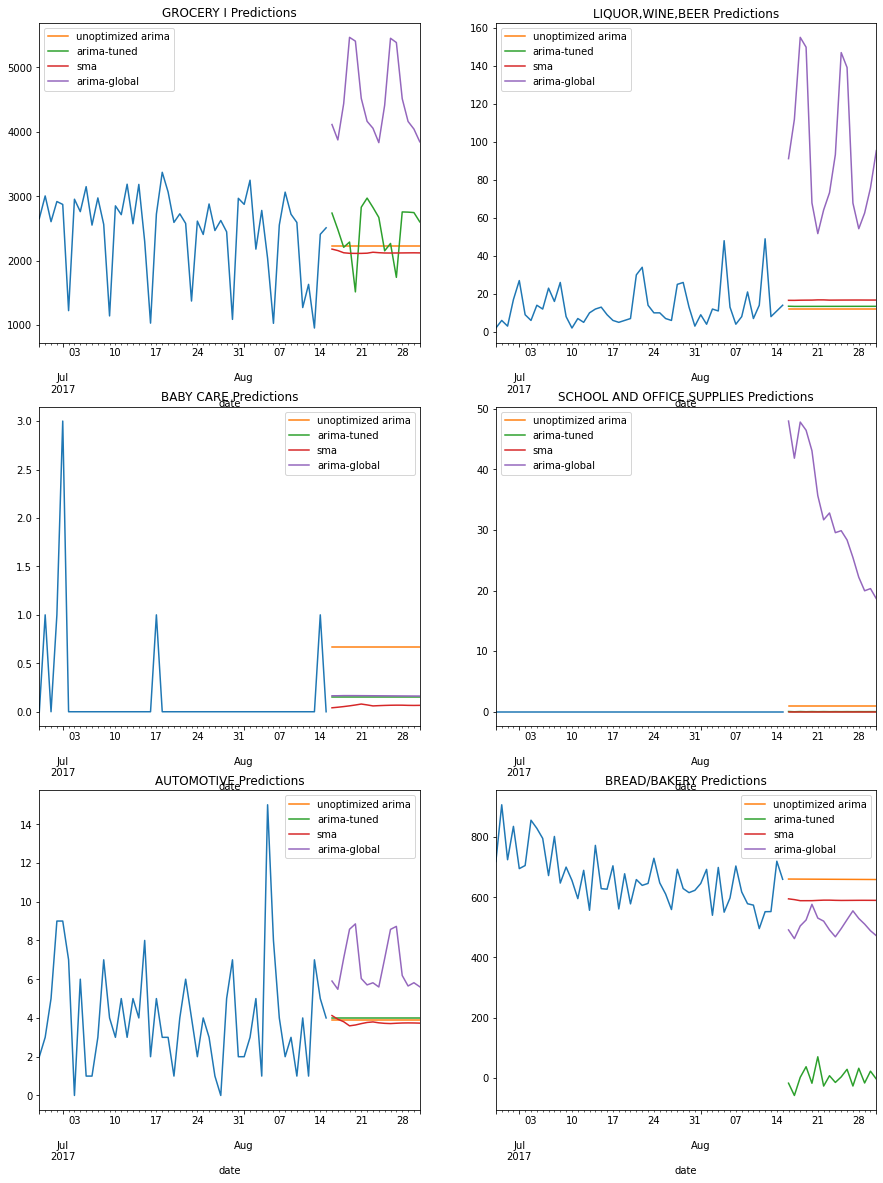

In [34]:
fig, ax = plt.subplots(3,2, figsize=(15,20))

train.groupby(['family', 'store_nbr']).get_group(('GROCERY I', 1))['sales'][-50:].plot(label='train', ax=ax[0][0], title='GROCERY I Predictions')
test.groupby(['family', 'store_nbr']).get_group(('GROCERY I', 1))[['unoptimized arima','arima-tuned', 'sma', 'arima-global']].plot(ax=ax[0][0])

ax[0][1] = train.groupby(['family', 'store_nbr']).get_group(('LIQUOR,WINE,BEER', 10))['sales'][-50:].plot(label='train', ax=ax[0][1], title='LIQUOR,WINE,BEER Predictions')
test.groupby(['family', 'store_nbr']).get_group(('LIQUOR,WINE,BEER', 10))[['unoptimized arima','arima-tuned', 'sma', 'arima-global']].plot(ax=ax[0][1])

ax[1][0] = train.groupby(['family', 'store_nbr']).get_group(('BABY CARE', 20))['sales'][-50:].plot(label='train', ax=ax[1][0], title='BABY CARE Predictions')
test.groupby(['family', 'store_nbr']).get_group(('BABY CARE', 20))[['unoptimized arima','arima-tuned', 'sma', 'arima-global']].plot(ax=ax[1][0])

ax[1][1] = train.groupby(['family', 'store_nbr']).get_group(('SCHOOL AND OFFICE SUPPLIES', 54))['sales'][-50:].plot(label='train', ax=ax[1][1], title='SCHOOL AND OFFICE SUPPLIES Predictions')
test.groupby(['family', 'store_nbr']).get_group(('SCHOOL AND OFFICE SUPPLIES', 54))[['unoptimized arima','arima-tuned', 'sma', 'arima-global']].plot(ax=ax[1][1])

ax[2][0] = train.groupby(['family', 'store_nbr']).get_group(('AUTOMOTIVE', 42))['sales'][-50:].plot(label='train', ax=ax[2][0], title='AUTOMOTIVE Predictions')
test.groupby(['family', 'store_nbr']).get_group(('AUTOMOTIVE', 42))[['unoptimized arima','arima-tuned', 'sma', 'arima-global']].plot(ax=ax[2][0])

ax[2][1] = train.groupby(['family', 'store_nbr']).get_group(('BREAD/BAKERY', 7))['sales'][-50:].plot(label='train', ax=ax[2][1], title='BREAD/BAKERY Predictions')
test.groupby(['family', 'store_nbr']).get_group(('BREAD/BAKERY', 7))[['unoptimized arima','arima-tuned', 'sma', 'arima-global']].plot(ax=ax[2][1])

plt.show()

### Deep Learning
- RNN? -> LSTM, Maybe LSTM with Attention -> Truly Global

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('data/store-sales-time-series-forecasting/train.csv', index_col='date')
train.index = pd.to_datetime(train.index)
train

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [4]:
from geopy.geocoders.nominatim import Nominatim
import swifter

stores_df = pd.read_csv('data/store-sales-time-series-forecasting/stores.csv')

# Get coordinates for spatial feature
geo_locator = Nominatim(user_agent='geoapiExercises')

def get_lat_long(city, state):
    location = geo_locator.geocode(f"{city}, {state}, Ecuador")
    return location.latitude ,location.longitude

stores_df['coords'] = stores_df.swifter.apply(lambda row: get_lat_long(city=row['city'], state=row['state']), axis=1)

stores_df

Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

,store_nbr,city,state,type,cluster,coords
0,1,Quito,Pichincha,D,13,"(-0.2201641, -78.5123274)"
1,2,Quito,Pichincha,D,13,"(-0.2201641, -78.5123274)"
2,3,Quito,Pichincha,D,8,"(-0.2201641, -78.5123274)"
3,4,Quito,Pichincha,D,9,"(-0.2201641, -78.5123274)"
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,"(-0.24750275, -79.17131708347992)"
5,6,Quito,Pichincha,D,13,"(-0.2201641, -78.5123274)"
6,7,Quito,Pichincha,D,8,"(-0.2201641, -78.5123274)"
7,8,Quito,Pichincha,D,8,"(-0.2201641, -78.5123274)"
8,9,Quito,Pichincha,B,6,"(-0.2201641, -78.5123274)"
9,10,Quito,Pichincha,C,15,"(-0.2201641, -78.5123274)"


In [5]:
holidays = pd.read_csv('data/store-sales-time-series-forecasting/holidays_events.csv')
holidays.date = pd.to_datetime(holidays.date)
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [6]:
# Merge, train and holiday dataframe
train.reset_index(inplace=True)
train_with_locale = pd.merge(left=train, right=stores_df[['store_nbr','city', 'state', 'coords']], on='store_nbr') # merge spatial info into train
train_with_holidays_and_local = pd.merge(train_with_locale, holidays, left_on=['date', 'city'], right_on=['date', 'locale_name'], how='left') # merge spatially dependent holidays
train_with_holidays_and_local = pd.merge(train_with_holidays_and_local, holidays.loc[holidays.locale == 'National'], left_on='date', right_on='date', how='left') # merge national holidays

# Merge all columns from the pd merge oprations into global ones
train_with_holidays_and_local['holiday_type'] = train_with_holidays_and_local.type_x.fillna(train_with_holidays_and_local.type_y)
train_with_holidays_and_local['holiday_locale'] = train_with_holidays_and_local.locale_x.fillna(train_with_holidays_and_local.locale_y)
train_with_holidays_and_local['holiday_description'] = train_with_holidays_and_local.description_x.fillna(train_with_holidays_and_local.description_y)
train_with_holidays_and_local.holiday_type = train_with_holidays_and_local.holiday_type.fillna('Normal day') # Fill Non Holiday days, so they still get assigned a numeric representation

holiday_ids = train_with_holidays_and_local.holiday_type.unique()
holiday_ids = pd.DataFrame(holiday_ids, columns=['holiday_type'])
holiday_ids['holiday_id'] = pd.factorize(holiday_ids.holiday_type)[0]
holiday_ids

train_with_holidays_and_local = pd.merge(left=train_with_holidays_and_local, right=holiday_ids, on='holiday_type') # Assign Numeric Representations to holiday types
train_with_holidays_and_local.drop(columns=['type_x', 'locale_x', 'locale_name_x', 'description_x', 'transferred_x', 'type_y', 'locale_y', 'locale_name_y', 'description_y', 'transferred_y'], inplace=True) # drop unnecessary columns
train_with_holidays_and_local

,date,id,store_nbr,family,sales,onpromotion,city,state,coords,holiday_type,holiday_locale,holiday_description,holiday_id
0,2013-01-01,0,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Holiday,National,Primer dia del ano,0
1,2013-01-01,1,1,BABY CARE,0.000,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Holiday,National,Primer dia del ano,0
2,2013-01-01,2,1,BEAUTY,0.000,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Holiday,National,Primer dia del ano,0
3,2013-01-01,3,1,BEVERAGES,0.000,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Holiday,National,Primer dia del ano,0
4,2013-01-01,4,1,BOOKS,0.000,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Holiday,National,Primer dia del ano,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008275,2016-11-04,2496577,9,POULTRY,566.242,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Bridge,National,Puente Dia de Difuntos,6
3008276,2016-11-04,2496578,9,PREPARED FOODS,123.090,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Bridge,National,Puente Dia de Difuntos,6
3008277,2016-11-04,2496579,9,PRODUCE,1401.963,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Bridge,National,Puente Dia de Difuntos,6
3008278,2016-11-04,2496580,9,SCHOOL AND OFFICE SUPPLIES,0.000,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Bridge,National,Puente Dia de Difuntos,6


In [7]:


train_with_holidays_and_local.drop(columns=['id', 'holiday_description', 'holiday_type', 'holiday_locale'], inplace=True)

# Create Numeric representation of Features

train_with_holidays_and_local.drop(columns=['city', 'state'], inplace=True)

# Assign numeric rep for family
train_with_holidays_and_local.family = pd.factorize(train_with_holidays_and_local.family)[0]

train_with_holidays_and_local

,date,store_nbr,family,sales,onpromotion,coords,holiday_id
0,2013-01-01,1,0,0.000,0,"(-0.2201641, -78.5123274)",0
1,2013-01-01,1,1,0.000,0,"(-0.2201641, -78.5123274)",0
2,2013-01-01,1,2,0.000,0,"(-0.2201641, -78.5123274)",0
3,2013-01-01,1,3,0.000,0,"(-0.2201641, -78.5123274)",0
4,2013-01-01,1,4,0.000,0,"(-0.2201641, -78.5123274)",0
...,...,...,...,...,...,...,...
3008275,2016-11-04,9,28,566.242,0,"(-0.2201641, -78.5123274)",6
3008276,2016-11-04,9,29,123.090,0,"(-0.2201641, -78.5123274)",6
3008277,2016-11-04,9,30,1401.963,0,"(-0.2201641, -78.5123274)",6
3008278,2016-11-04,9,31,0.000,0,"(-0.2201641, -78.5123274)",6


In [8]:
train_with_holidays_and_local['year'] = train_with_holidays_and_local.date.dt.year
train_with_holidays_and_local['month'] = train_with_holidays_and_local.date.dt.month
train_with_holidays_and_local['day'] = train_with_holidays_and_local.date.dt.day
train_with_holidays_and_local['day_of_week'] = train_with_holidays_and_local.date.dt.dayofweek
train_with_holidays_and_local.drop(columns=['date'], inplace=True)
train_with_holidays_and_local

,store_nbr,family,sales,onpromotion,coords,holiday_id,year,month,day,day_of_week
0,1,0,0.000,0,"(-0.2201641, -78.5123274)",0,2013,1,1,1
1,1,1,0.000,0,"(-0.2201641, -78.5123274)",0,2013,1,1,1
2,1,2,0.000,0,"(-0.2201641, -78.5123274)",0,2013,1,1,1
3,1,3,0.000,0,"(-0.2201641, -78.5123274)",0,2013,1,1,1
4,1,4,0.000,0,"(-0.2201641, -78.5123274)",0,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...
3008275,9,28,566.242,0,"(-0.2201641, -78.5123274)",6,2016,11,4,4
3008276,9,29,123.090,0,"(-0.2201641, -78.5123274)",6,2016,11,4,4
3008277,9,30,1401.963,0,"(-0.2201641, -78.5123274)",6,2016,11,4,4
3008278,9,31,0.000,0,"(-0.2201641, -78.5123274)",6,2016,11,4,4


In [9]:
train_with_holidays_and_local['lat'] = train_with_holidays_and_local.coords.swifter.apply(lambda x: x[0])
train_with_holidays_and_local['long'] = train_with_holidays_and_local.coords.swifter.apply(lambda x: x[1])
train_with_holidays_and_local.drop(columns=['coords'], inplace=True)
train_with_holidays_and_local


Pandas Apply:   0%|          | 0/3008280 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3008280 [00:00<?, ?it/s]

,store_nbr,family,sales,onpromotion,holiday_id,year,month,day,day_of_week,lat,long
0,1,0,0.000,0,0,2013,1,1,1,-0.220164,-78.512327
1,1,1,0.000,0,0,2013,1,1,1,-0.220164,-78.512327
2,1,2,0.000,0,0,2013,1,1,1,-0.220164,-78.512327
3,1,3,0.000,0,0,2013,1,1,1,-0.220164,-78.512327
4,1,4,0.000,0,0,2013,1,1,1,-0.220164,-78.512327
...,...,...,...,...,...,...,...,...,...,...,...
3008275,9,28,566.242,0,6,2016,11,4,4,-0.220164,-78.512327
3008276,9,29,123.090,0,6,2016,11,4,4,-0.220164,-78.512327
3008277,9,30,1401.963,0,6,2016,11,4,4,-0.220164,-78.512327
3008278,9,31,0.000,0,6,2016,11,4,4,-0.220164,-78.512327


In [19]:
test = pd.read_csv('data/store-sales-time-series-forecasting/test.csv')
test.date = pd.to_datetime(test.date)
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [20]:
test_with_locale = pd.merge(left=test, right=stores_df[['store_nbr','city', 'state', 'coords']], on='store_nbr') # merge spatial info into train
test_with_holidays_and_local = pd.merge(test_with_locale, holidays, left_on=['date', 'city'], right_on=['date', 'locale_name'], how='left') # merge spatially dependent holidays
test_with_holidays_and_local = pd.merge(test_with_holidays_and_local, holidays.loc[holidays.locale == 'National'], left_on='date', right_on='date', how='left') # merge national holidays

# Merge all columns from the pd merge oprations into global ones
test_with_holidays_and_local['holiday_type'] = test_with_holidays_and_local.type_x.fillna(test_with_holidays_and_local.type_y)
test_with_holidays_and_local['holiday_locale'] = test_with_holidays_and_local.locale_x.fillna(test_with_holidays_and_local.locale_y)
test_with_holidays_and_local['holiday_description'] = test_with_holidays_and_local.description_x.fillna(test_with_holidays_and_local.description_y)
test_with_holidays_and_local.holiday_type = test_with_holidays_and_local.holiday_type.fillna('Normal day') # Fill Non Holiday days, so they still get assigned a numeric representation
test_with_holidays_and_local = pd.merge(left=test_with_holidays_and_local, right=holiday_ids, on='holiday_type', how='left') # Assign Numeric Representations to holiday types
test_with_holidays_and_local.drop(columns=['type_x', 'locale_x', 'locale_name_x', 'description_x', 'transferred_x', 'type_y', 'locale_y', 'locale_name_y', 'description_y', 'transferred_y'], inplace=True) # drop unnecessary columns
test_with_holidays_and_local

,id,date,store_nbr,family,onpromotion,city,state,coords,holiday_type,holiday_locale,holiday_description,holiday_id
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Normal day,NaN,NaN,1
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Normal day,NaN,NaN,1
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,"(-0.2201641, -78.5123274)",Normal day,NaN,NaN,1
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,"(-0.2201641, -78.5123274)",Normal day,NaN,NaN,1
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Normal day,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,"(-0.2201641, -78.5123274)",Normal day,NaN,NaN,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,"(-0.2201641, -78.5123274)",Normal day,NaN,NaN,1
28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,"(-0.2201641, -78.5123274)",Normal day,NaN,NaN,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,"(-0.2201641, -78.5123274)",Normal day,NaN,NaN,1


In [21]:
test_with_holidays_and_local.drop(columns=['id', 'holiday_description', 'holiday_type', 'holiday_locale'], inplace=True)

# Create Numeric representation of Features

test_with_holidays_and_local.drop(columns=['city', 'state'], inplace=True)

# Assign numeric rep for family
test_with_holidays_and_local.family = pd.factorize(test_with_holidays_and_local.family)[0]

test_with_holidays_and_local

,date,store_nbr,family,onpromotion,coords,holiday_id
0,2017-08-16,1,0,0,"(-0.2201641, -78.5123274)",1
1,2017-08-16,1,1,0,"(-0.2201641, -78.5123274)",1
2,2017-08-16,1,2,2,"(-0.2201641, -78.5123274)",1
3,2017-08-16,1,3,20,"(-0.2201641, -78.5123274)",1
4,2017-08-16,1,4,0,"(-0.2201641, -78.5123274)",1
...,...,...,...,...,...,...
28507,2017-08-31,9,28,1,"(-0.2201641, -78.5123274)",1
28508,2017-08-31,9,29,0,"(-0.2201641, -78.5123274)",1
28509,2017-08-31,9,30,1,"(-0.2201641, -78.5123274)",1
28510,2017-08-31,9,31,9,"(-0.2201641, -78.5123274)",1


In [22]:
test_with_holidays_and_local['year'] = test_with_holidays_and_local.date.dt.year
test_with_holidays_and_local['month'] = test_with_holidays_and_local.date.dt.month
test_with_holidays_and_local['day'] = test_with_holidays_and_local.date.dt.day
test_with_holidays_and_local['day_of_week'] = test_with_holidays_and_local.date.dt.dayofweek
test_with_holidays_and_local.drop(columns=['date'], inplace=True)
test_with_holidays_and_local

,store_nbr,family,onpromotion,coords,holiday_id,year,month,day,day_of_week
0,1,0,0,"(-0.2201641, -78.5123274)",1,2017,8,16,2
1,1,1,0,"(-0.2201641, -78.5123274)",1,2017,8,16,2
2,1,2,2,"(-0.2201641, -78.5123274)",1,2017,8,16,2
3,1,3,20,"(-0.2201641, -78.5123274)",1,2017,8,16,2
4,1,4,0,"(-0.2201641, -78.5123274)",1,2017,8,16,2
...,...,...,...,...,...,...,...,...,...
28507,9,28,1,"(-0.2201641, -78.5123274)",1,2017,8,31,3
28508,9,29,0,"(-0.2201641, -78.5123274)",1,2017,8,31,3
28509,9,30,1,"(-0.2201641, -78.5123274)",1,2017,8,31,3
28510,9,31,9,"(-0.2201641, -78.5123274)",1,2017,8,31,3


In [23]:
test_with_holidays_and_local['lat'] = test_with_holidays_and_local.coords.swifter.apply(lambda x: x[0])
test_with_holidays_and_local['long'] = test_with_holidays_and_local.coords.swifter.apply(lambda x: x[1])
test_with_holidays_and_local.drop(columns=['coords'], inplace=True)
test_with_holidays_and_local

Pandas Apply:   0%|          | 0/28512 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/28512 [00:00<?, ?it/s]

,store_nbr,family,onpromotion,holiday_id,year,month,day,day_of_week,lat,long
0,1,0,0,1,2017,8,16,2,-0.220164,-78.512327
1,1,1,0,1,2017,8,16,2,-0.220164,-78.512327
2,1,2,2,1,2017,8,16,2,-0.220164,-78.512327
3,1,3,20,1,2017,8,16,2,-0.220164,-78.512327
4,1,4,0,1,2017,8,16,2,-0.220164,-78.512327
...,...,...,...,...,...,...,...,...,...,...
28507,9,28,1,1,2017,8,31,3,-0.220164,-78.512327
28508,9,29,0,1,2017,8,31,3,-0.220164,-78.512327
28509,9,30,1,1,2017,8,31,3,-0.220164,-78.512327
28510,9,31,9,1,2017,8,31,3,-0.220164,-78.512327


In [53]:
global_df = pd.concat([train_with_holidays_and_local, test_with_holidays_and_local])
global_df
sales = global_df.sales
global_df = (global_df-global_df.min()) / (global_df.max()-global_df.min())
global_df.sales = sales / sales.max() # TODO: Scale labels by maximum value -> Large labels leads to a large mse -> Leads to large grads -> Leads to exploding or dieing weights -> Network does not learn as observed below
global_df

,store_nbr,family,sales,onpromotion,holiday_id,year,month,day,day_of_week,lat,long
0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.166667,0.760866,0.826489
1,0.000000,0.03125,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.166667,0.760866,0.826489
2,0.000000,0.06250,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.166667,0.760866,0.826489
3,0.000000,0.09375,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.166667,0.760866,0.826489
4,0.000000,0.12500,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.166667,0.760866,0.826489
...,...,...,...,...,...,...,...,...,...,...,...
28507,0.150943,0.87500,NaN,0.001350,0.166667,1.0,0.636364,1.0,0.500000,0.760866,0.826489
28508,0.150943,0.90625,NaN,0.000000,0.166667,1.0,0.636364,1.0,0.500000,0.760866,0.826489
28509,0.150943,0.93750,NaN,0.001350,0.166667,1.0,0.636364,1.0,0.500000,0.760866,0.826489
28510,0.150943,0.96875,NaN,0.012146,0.166667,1.0,0.636364,1.0,0.500000,0.760866,0.826489


In [60]:
test_normalized = global_df[len(train_with_holidays_and_local):]
train_normalized = global_df[:len(train_with_holidays_and_local)]

# perform 80, 20 split for train and val
len_val = len(train.date.unique()) * 0.2
len_train = len(train_normalized) - len_val

val_normalized = train_normalized[len_train:]
train_normalized = train_normalized[:len_train]

test_normalized

,store_nbr,family,sales,onpromotion,holiday_id,year,month,day,day_of_week,lat,long
0,0.000000,0.00000,NaN,0.000000,0.166667,1.0,0.636364,0.5,0.333333,0.760866,0.826489
1,0.000000,0.03125,NaN,0.000000,0.166667,1.0,0.636364,0.5,0.333333,0.760866,0.826489
2,0.000000,0.06250,NaN,0.002699,0.166667,1.0,0.636364,0.5,0.333333,0.760866,0.826489
3,0.000000,0.09375,NaN,0.026991,0.166667,1.0,0.636364,0.5,0.333333,0.760866,0.826489
4,0.000000,0.12500,NaN,0.000000,0.166667,1.0,0.636364,0.5,0.333333,0.760866,0.826489
...,...,...,...,...,...,...,...,...,...,...,...
28507,0.150943,0.87500,NaN,0.001350,0.166667,1.0,0.636364,1.0,0.500000,0.760866,0.826489
28508,0.150943,0.90625,NaN,0.000000,0.166667,1.0,0.636364,1.0,0.500000,0.760866,0.826489
28509,0.150943,0.93750,NaN,0.001350,0.166667,1.0,0.636364,1.0,0.500000,0.760866,0.826489
28510,0.150943,0.96875,NaN,0.012146,0.166667,1.0,0.636364,1.0,0.500000,0.760866,0.826489


In [209]:
import torch
from torch.utils.data import Dataset, DataLoader

class StoreSalesTimeSeriesForecasting(Dataset):

    def __init__(self, df: pd.DataFrame, window=7):
        self.df = df
        self.window = 7

    def __len__(self):
        return len(self.df)-1

    def __getitem__(self, idx):

        store_in_question = self.df.iloc[idx].store_nbr.item()
        columns_to_keep = self.df.columns[self.df.columns != 'sales']

        if idx < 7:
            t = torch.zeros((7-(idx+1), 10))
            return {"input": torch.concat(
                    tensors=[
                        t,
                        torch.Tensor(self.df.loc[self.df.store_nbr == store_in_question, columns_to_keep].iloc[:idx+1].to_numpy())
                    ],
                    dim=0
                ),
                "labels": torch.concat(
                    tensors=[
                        torch.zeros((7-(idx+1), 1)),
                        torch.Tensor(self.df.loc[self.df.store_nbr == store_in_question, 'sales'].iloc[:idx+1].to_numpy()).reshape((idx+1,1))
                    ]
                )
            }

        labels = torch.Tensor(self.df.loc[self.df.store_nbr == store_in_question, 'sales'].iloc[idx-self.window:idx].to_numpy())
        data = {"input": torch.Tensor(self.df.loc[self.df.store_nbr == store_in_question, columns_to_keep].iloc[idx-self.window:idx].to_numpy()), "labels": labels.reshape((labels.size()[0], 1))}
        if data.get('input').size()[0] != 7:
            data['input'] = torch.concat(
                tensors=[
                    torch.zeros((self.window - data['input'].size()[0], 10)),
                    data['input']
                ]
            )
            data['labels'] = torch.concat(
                tensors=[
                    torch.zeros((self.window - data['labels'].size()[0], 1)),
                    data['labels']
                ]
            )
        return data

In [198]:
dataset = StoreSalesTimeSeriesForecasting(df=train_normalized)
dataloader = torch.utils.data.DataLoader(dataset=dataset, shuffle=False, batch_size=5)
for sample in dataloader:
    print(sample)
    break

{'input': tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1667,
          0.7609, 0.8265]],

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
     

In [212]:
import torch
from torch.utils.data import Dataset, DataLoader

class StoreSalesTimeSeriesForecastingTest(Dataset):

    def __init__(self, df: pd.DataFrame, fill: pd.DataFrame, window=7):
        self.df = df
        self.window = window
        self.train = train

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        store_in_question = self.df.iloc[idx].store_nbr.item()
        columns_to_keep = self.df.columns[self.df.columns != 'sales']

        if idx < 7:
            t = torch.Tensor(self.train.loc[self.train.store_nbr == store_in_question, columns_to_keep].iloc[7-(idx+1):].to_numpy()) # Fill with train data to 'initialize' the RNN generation process and provide a meaningful context at the beginning of the testing sequence
            return torch.concat(
                tensors=[
                    t,
                    torch.Tensor(self.df.loc[self.df.store_nbr == store_in_question, columns_to_keep].iloc[:idx+1].to_numpy())
                ],
                dim=0
            )

        data = torch.Tensor(self.df.loc[self.df.store_nbr == store_in_question, columns_to_keep].iloc[idx-self.window:idx].to_numpy())
        if data.size()[0] != 7:
            data = torch.concat(
                tensors=[
                    torch.zeros((self.window - data.size()[0], 10)),
                    data
                ]
            )
        return data

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class StoreSalesTimeSeriesForecastingVal(Dataset):

    def __init__(self, df: pd.DataFrame, fill: pd.DataFrame, window=7):
        self.df = df
        self.window = window
        self.train = fill

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        store_in_question = self.df.iloc[idx].store_nbr.item()
        columns_to_keep = self.df.columns[self.df.columns != 'sales']

        if idx < 7:
            t = torch.Tensor(self.train.loc[self.train.store_nbr == store_in_question, columns_to_keep].iloc[7-(idx+1):].to_numpy()) # Fill with train data to 'initialize' the RNN generation process and provide a meaningful context at the beginning of the testing sequence
            t_labels = torch.Tensor(self.train.loc[self.train.store_nbr == store_in_question, 'sales'].iloc[7-(idx+1):].to_numpy())
            return {"input": torch.concat(
                    tensors=[
                        t,
                        torch.Tensor(self.df.loc[self.df.store_nbr == store_in_question, columns_to_keep].iloc[:idx+1].to_numpy())
                    ],
                    dim=0
                ),
                "labels": torch.concat(
                    tensors=[
                        t_labels,
                        torch.Tensor(self.df.loc[self.df.store_nbr == store_in_question, 'sales'].iloc[:idx+1].to_numpy()).reshape((idx+1,1))
                    ]
                )
            }

        labels = torch.Tensor(self.df.loc[self.df.store_nbr == store_in_question, 'sales'].iloc[idx-self.window:idx].to_numpy())
        data = {"input": torch.Tensor(self.df.loc[self.df.store_nbr == store_in_question, columns_to_keep].iloc[idx-self.window:idx].to_numpy()),
        "labels": labels.reshape((labels.size()[0], 1))
        }
        if data['input'].size()[0] != 7:
            data['input'] = torch.concat(
                tensors=[
                    torch.zeros((self.window - data['input'].size()[0], 10)),
                    data['input']
                ]
            )
            data['labels'] = torch.concat(
                tensors=[
                    torch.zeros((self.window - data['labels'].size()[0], 1)),
                    data['labels']
                ]
            )
        return data

In [213]:
dataset = StoreSalesTimeSeriesForecastingTest(test_normalized.groupby('family').get_group(0.0), fill=train_normalized.groupby('family').get_group(0.0))
dataloader = torch.utils.data.DataLoader(dataset=dataset, shuffle=False, batch_size=5)
for sample in dataloader:
    print(sample)
    break

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.1667, 1.0000, 0.6364, 0.5000, 0.3333,
          0.7609, 0.8265]],

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.000

In [114]:
class LSTMForTimeSeriesForecasting(torch.nn.Module):

    def __init__(self, k=4):
        super().__init__()

        self.k = k
        self.lstms_encoder = torch.nn.ModuleList([
            torch.nn.LSTM(input_size=10, hidden_size=50, num_layers=1, batch_first=True) if i == 0 else torch.nn.LSTM(input_size=50, hidden_size=50, num_layers=1, batch_first=True) for i in range(k)
        ])

        self.regression_head = torch.nn.Sequential(
            torch.nn.Linear(in_features=50, out_features=30),
            torch.nn.Sigmoid(),
            torch.nn.Linear(in_features=30, out_features=10),
            torch.nn.Sigmoid(),
            torch.nn.Linear(in_features=10, out_features=1),
            torch.nn.Sigmoid()
        )

    def forward(self, inp):

        residual_x = torch.zeros(size=(inp.size()[0], inp.size()[1], 50)).to('cuda')
        h = inp
        for lstm in self.lstms_encoder:
            h = lstm(h)[0] # (batch_size, Seq_len, features)
            residual_x = residual_x.add(h) # residual connection around every lstm layer

        # residual_x = residual_x[:, -1, :]
        # print(residual_x.size())
        out = self.regression_head(residual_x)
        return out

In [220]:
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

num_epochs = 1

t = train_normalized.groupby('family').get_group(0.0)

dataset = StoreSalesTimeSeriesForecasting(df=t)
val_dataset = StoreSalesTimeSeriesForecastingTest(df=val_normalized.groupby('family').get_group(0.0), fill=t)
dl = torch.utils.data.DataLoader(dataset=dataset, shuffle=False, batch_size=5)
val_dl = torch.utils.data.DataLoader(dataset=val_dataset, shuffle=False, batch_size=5)
model = LSTMForTimeSeriesForecasting()

torch.device('cuda')
model = model.to('cuda')

loss_fn = torch.nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.2e-2)

tensorboard_writer = SummaryWriter()


optim_step = 0
val_step = 0

for epoch in tqdm(range(num_epochs)):

    train_loss = torch.zeros((1,))

    for batch_nbr, batch in enumerate(tqdm(dl)):

        batched_input = batch['input']
        labels = batch['labels']

        batched_input = batched_input.to('cuda')
        labels = labels.to('cuda')

        pred = model(batched_input)
        loss = loss_fn(pred, labels)
        optim.zero_grad()
        loss.backward()
        optim.step()

        tensorboard_writer.add_scalar("loss/batch_train", loss, optim_step)
        # print(pred)
        optim_step += 1
        train_loss = torch.concat(train_loss, loss)

    train_loss = torch.mean(train_loss)
    tensorboard_writer.add_scalar("loss/train", train_loss, epoch)

    val_loss = torch.zeros((1,))
    for batch_nbr, batch in enumerate(tqdm(val_dl)):
        with torch.no_grad:

            batched_input = batch['input']
            labels = batch['labels']

            batched_input = batched_input.to('cuda')
            labels = labels.to('cuda')

            pred = model(batched_input)
            loss = loss_fn(pred, labels)

            tensorboard_writer.add_scalar("loss/batch_val", loss, val_step)
            val_step += 1
            val_loss = torch.concat(loss, val_loss)

    val_loss = torch.mean(val_loss)
    tensorboard_writer.add_scalar("loss/val", val_loss, epoch)

# TODO: Test Validation, debug Model further


tensorboard_writer.flush()
torch.save(model.state_dict(), f'./models/SimpleLSTMForTimeSeriesForecasting_{num_epochs}')

# Model starts to predict the same value for everything after a while of training

  0%|                                                                                                                                                                                                                                                                                | 7/18232 [00:00<04:38, 65.42it/s]

tensor([[[0.4743],
         [0.4744],
         [0.4745],
         [0.4745],
         [0.4745],
         [0.4745],
         [0.4745]],

        [[0.4743],
         [0.4744],
         [0.4745],
         [0.4745],
         [0.4745],
         [0.4745],
         [0.4745]],

        [[0.4743],
         [0.4744],
         [0.4745],
         [0.4745],
         [0.4745],
         [0.4745],
         [0.4745]],

        [[0.4743],
         [0.4744],
         [0.4745],
         [0.4745],
         [0.4745],
         [0.4745],
         [0.4745]],

        [[0.4743],
         [0.4744],
         [0.4744],
         [0.4745],
         [0.4745],
         [0.4745],
         [0.4745]]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[[0.4689],
         [0.4688],
         [0.4688],
         [0.4687],
         [0.4687],
         [0.4687],
         [0.4687]],

        [[0.4689],
         [0.4688],
         [0.4688],
         [0.4688],
         [0.4687],
         [0.4687],
         [0.4687]],

        [[


  0%|▎                                                                                                                                                                                                                                                                              | 21/18232 [00:00<04:48, 63.07it/s]

tensor([[[0.5214],
         [0.5232],
         [0.5249],
         [0.5261],
         [0.5271],
         [0.5279],
         [0.5285]],

        [[0.5214],
         [0.5233],
         [0.5248],
         [0.5260],
         [0.5270],
         [0.5279],
         [0.5286]],

        [[0.5214],
         [0.5232],
         [0.5247],
         [0.5260],
         [0.5270],
         [0.5279],
         [0.5286]],

        [[0.5213],
         [0.5230],
         [0.5246],
         [0.5259],
         [0.5271],
         [0.5280],
         [0.5287]],

        [[0.5213],
         [0.5231],
         [0.5247],
         [0.5261],
         [0.5272],
         [0.5281],
         [0.5287]]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[[0.5267],
         [0.5289],
         [0.5310],
         [0.5328],
         [0.5343],
         [0.5353],
         [0.5361]],

        [[0.5268],
         [0.5290],
         [0.5311],
         [0.5329],
         [0.5342],
         [0.5353],
         [0.5361]],

        [[


  0%|▌                                                                                                                                                                                                                                                                              | 35/18232 [00:00<04:40, 64.84it/s]

tensor([[[0.6143],
         [0.6291],
         [0.6333],
         [0.6342],
         [0.6344],
         [0.6344],
         [0.6345]],

        [[0.6145],
         [0.6290],
         [0.6333],
         [0.6341],
         [0.6344],
         [0.6344],
         [0.6345]],

        [[0.6132],
         [0.6282],
         [0.6331],
         [0.6341],
         [0.6343],
         [0.6344],
         [0.6345]],

        [[0.6135],
         [0.6284],
         [0.6332],
         [0.6341],
         [0.6344],
         [0.6344],
         [0.6345]],

        [[0.6137],
         [0.6287],
         [0.6332],
         [0.6341],
         [0.6344],
         [0.6344],
         [0.6345]]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[[0.6221],
         [0.6371],
         [0.6407],
         [0.6413],
         [0.6415],
         [0.6415],
         [0.6416]],

        [[0.6224],
         [0.6373],
         [0.6407],
         [0.6413],
         [0.6415],
         [0.6415],
         [0.6416]],

        [[


  0%|▋                                                                                                                                                                                                                                                                              | 49/18232 [00:00<04:37, 65.41it/s]

tensor([[[0.7142],
         [0.7188],
         [0.7191],
         [0.7191],
         [0.7191],
         [0.7191],
         [0.7190]],

        [[0.7127],
         [0.7188],
         [0.7190],
         [0.7191],
         [0.7191],
         [0.7190],
         [0.7190]],

        [[0.7131],
         [0.7188],
         [0.7190],
         [0.7191],
         [0.7190],
         [0.7190],
         [0.7191]],

        [[0.7134],
         [0.7188],
         [0.7190],
         [0.7190],
         [0.7190],
         [0.7191],
         [0.7191]],

        [[0.7137],
         [0.7188],
         [0.7190],
         [0.7190],
         [0.7191],
         [0.7191],
         [0.7191]]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[[0.7193],
         [0.7236],
         [0.7238],
         [0.7238],
         [0.7238],
         [0.7238],
         [0.7238]],

        [[0.7195],
         [0.7236],
         [0.7238],
         [0.7238],
         [0.7238],
         [0.7238],
         [0.7238]],

        [[


  0%|▉                                                                                                                                                                                                                                                                              | 63/18232 [00:00<04:42, 64.26it/s]


tensor([[[0.7741],
         [0.7756],
         [0.7757],
         [0.7757],
         [0.7757],
         [0.7757],
         [0.7757]],

        [[0.7742],
         [0.7756],
         [0.7757],
         [0.7757],
         [0.7757],
         [0.7757],
         [0.7757]],

        [[0.7742],
         [0.7756],
         [0.7757],
         [0.7757],
         [0.7757],
         [0.7757],
         [0.7757]],

        [[0.7744],
         [0.7757],
         [0.7757],
         [0.7757],
         [0.7757],
         [0.7757],
         [0.7757]],

        [[0.7745],
         [0.7757],
         [0.7757],
         [0.7757],
         [0.7757],
         [0.7757],
         [0.7757]]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[[0.7775],
         [0.7786],
         [0.7786],
         [0.7786],
         [0.7787],
         [0.7787],
         [0.7787]],

        [[0.7772],
         [0.7786],
         [0.7786],
         [0.7786],
         [0.7786],
         [0.7787],
         [0.7787]],

        [[

  0%|█▏                                                                                                                                                                                                                                                                             | 77/18232 [00:01<04:36, 65.74it/s]

tensor([[[0.8043],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048]],

        [[0.8044],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048]],

        [[0.8044],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048]],

        [[0.8044],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048]],

        [[0.8044],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048],
         [0.8048]]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[[0.8056],
         [0.8059],
         [0.8059],
         [0.8059],
         [0.8059],
         [0.8059],
         [0.8059]],

        [[0.8054],
         [0.8059],
         [0.8059],
         [0.8059],
         [0.8059],
         [0.8059],
         [0.8059]],

        [[


  0%|█▎                                                                                                                                                                                                                                                                             | 91/18232 [00:01<04:30, 67.16it/s]


tensor([[[0.8224],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229]],

        [[0.8225],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229]],

        [[0.8225],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229]],

        [[0.8225],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229]],

        [[0.8224],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229],
         [0.8229]]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[[0.8245],
         [0.8249],
         [0.8249],
         [0.8249],
         [0.8249],
         [0.8249],
         [0.8249]],

        [[0.8245],
         [0.8249],
         [0.8249],
         [0.8249],
         [0.8249],
         [0.8249],
         [0.8249]],

        [[

  1%|█▌                                                                                                                                                                                                                                                                            | 105/18232 [00:01<04:31, 66.82it/s]

tensor([[[0.8512],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515]],

        [[0.8512],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515]],

        [[0.8511],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515]],

        [[0.8511],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515]],

        [[0.8511],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515],
         [0.8515]]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[[0.8528],
         [0.8531],
         [0.8531],
         [0.8531],
         [0.8531],
         [0.8531],
         [0.8531]],

        [[0.8528],
         [0.8531],
         [0.8531],
         [0.8531],
         [0.8531],
         [0.8531],
         [0.8531]],

        [[


  1%|█▊                                                                                                                                                                                                                                                                            | 119/18232 [00:01<04:30, 67.03it/s]

tensor([[[0.8712],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715]],

        [[0.8712],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715]],

        [[0.8712],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715]],

        [[0.8713],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715]],

        [[0.8713],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715],
         [0.8715]]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[[0.8729],
         [0.8732],
         [0.8732],
         [0.8732],
         [0.8732],
         [0.8732],
         [0.8732]],

        [[0.8729],
         [0.8732],
         [0.8732],
         [0.8732],
         [0.8732],
         [0.8732],
         [0.8732]],

        [[


  1%|█▉                                                                                                                                                                                                                                                                            | 134/18232 [00:02<04:25, 68.22it/s]

tensor([[[0.8939],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940]],

        [[0.8939],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940]],

        [[0.8939],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940]],

        [[0.8938],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940]],

        [[0.8939],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940],
         [0.8940]]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[[0.8952],
         [0.8953],
         [0.8953],
         [0.8953],
         [0.8953],
         [0.8953],
         [0.8953]],

        [[0.8952],
         [0.8953],
         [0.8953],
         [0.8953],
         [0.8953],
         [0.8953],
         [0.8953]],

        [[


  0%|                                                                                                                                                                                                                                                                                            | 0/1 [00:02<?, ?it/s]

tensor([[[0.9028],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029]],

        [[0.9028],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029]],

        [[0.9028],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029]],

        [[0.9028],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029]],

        [[0.9028],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029],
         [0.9029]]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[[0.9030],
         [0.9030],
         [0.9030],
         [0.9030],
         [0.9030],
         [0.9030],
         [0.9030]],

        [[0.9029],
         [0.9030],
         [0.9030],
         [0.9030],
         [0.9030],
         [0.9030],
         [0.9030]],

        [[

KeyboardInterrupt: 

In [31]:
torch.save(model.state_dict(), f'./models/SimpleLSTMForTimeSeriesForecasting_{num_epochs}')

#### Test LSTM

In [218]:
from tqdm import tqdm

# test_normalized.drop(columns=['sales'], inplace=True)

dataset = StoreSalesTimeSeriesForecastingTest(test_normalized.groupby('family').get_group(0.0), fill=val_normalized.groupby('family').get_group(0.0))
dl = DataLoader(shuffle=False, dataset=dataset, batch_size=8192)

# model.to('cuda')

res = test_normalized.groupby('family').get_group(0.0).copy()

preds = list()

for i, batch in enumerate(tqdm(dl)):

    batch = batch.to('cuda')

    with torch.no_grad():
        pred = model(batch)
        print(pred)
        preds += list(pred.cpu().numpy()[:,-1,:].reshape(-1))

res['sales'] = preds
res.sales = res.sales * sales.max() # Rescale sales



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]

tensor([[[0.0004],
         [0.0004],
         [0.0004],
         ...,
         [0.0004],
         [0.0004],
         [0.0004]],

        [[0.0004],
         [0.0004],
         [0.0004],
         ...,
         [0.0004],
         [0.0004],
         [0.0004]],

        [[0.0004],
         [0.0004],
         [0.0004],
         ...,
         [0.0004],
         [0.0004],
         [0.0004]],

        ...,

        [[0.0004],
         [0.0004],
         [0.0004],
         ...,
         [0.0004],
         [0.0004],
         [0.0004]],

        [[0.0004],
         [0.0004],
         [0.0004],
         ...,
         [0.0004],
         [0.0004],
         [0.0004]],

        [[0.0004],
         [0.0004],
         [0.0004],
         ...,
         [0.0004],
         [0.0004],
         [0.0004]]], device='cuda:0')


,store_nbr,family,onpromotion,holiday_id,year,month,day,day_of_week,lat,long,sales
0,0.000000,0.0,0.0,0.166667,1.0,0.636364,0.500000,0.333333,0.760866,0.826489,0.000448
33,0.000000,0.0,0.0,0.166667,1.0,0.636364,0.533333,0.500000,0.760866,0.826489,0.000448
66,0.000000,0.0,0.0,0.166667,1.0,0.636364,0.566667,0.666667,0.760866,0.826489,0.000448
99,0.000000,0.0,0.0,0.166667,1.0,0.636364,0.600000,0.833333,0.760866,0.826489,0.000448
132,0.000000,0.0,0.0,0.166667,1.0,0.636364,0.633333,1.000000,0.760866,0.826489,0.000448
...,...,...,...,...,...,...,...,...,...,...,...
28347,0.150943,0.0,0.0,0.166667,1.0,0.636364,0.866667,1.000000,0.760866,0.826489,0.000448
28380,0.150943,0.0,0.0,0.166667,1.0,0.636364,0.900000,0.000000,0.760866,0.826489,0.000448
28413,0.150943,0.0,0.0,0.166667,1.0,0.636364,0.933333,0.166667,0.760866,0.826489,0.000448
28446,0.150943,0.0,0.0,0.166667,1.0,0.636364,0.966667,0.333333,0.760866,0.826489,0.000448


In [3]:
import torch
torch.backends.mps.is_built()

True

## Evaluation
Given via the online tool

## Conclusion